<a href="https://colab.research.google.com/github/Nanashi-bot/exploratorydataanalysis/blob/main/edatheoryda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# GITHUB LINK:

# https://github.com/Nanashi-bot/exploratorydataanalysis

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from scipy import stats

df = pd.read_csv("/content/TravelMode.csv")

In [52]:
df = df.drop('rownames', axis = 1)
df.head()

individual   mode choice  wait  vcost  travel  gcost  income  size
0           1    air     no    69     59     100     70      35     1
1           1  train     no    34     31     372     71      35     1
2           1    bus     no    35     25     417     70      35     1
3           1    car    yes     0     10     180     30      35     1
4           2    air     no    64     58      68     68      30     2

In [53]:
print("Dimensions of the DataFrame:")
print(df.shape)

print("\nSummary of the DataFrame:")
print(df.describe())

print("\nData Types:")
print(df.dtypes)

print("\nChecking for Missing Values:")
print(df.isnull().sum())

Dimensions of the DataFrame:
(840, 9)

Summary of the DataFrame:
       individual        wait       vcost       travel       gcost  \
count  840.000000  840.000000  840.000000   840.000000  840.000000   
mean   105.500000   34.589286   47.760714   486.165476  110.879762   
std     60.657207   24.948608   32.371004   301.439107   47.978353   
min      1.000000    0.000000    2.000000    63.000000   30.000000   
25%     53.000000    0.750000   23.000000   234.000000   71.000000   
50%    105.500000   35.000000   39.000000   397.000000  101.500000   
75%    158.000000   53.000000   66.250000   795.500000  144.000000   
max    210.000000   99.000000  180.000000  1440.000000  269.000000   

           income        size  
count  840.000000  840.000000  
mean    34.547619    1.742857  
std     19.676044    1.010350  
min      2.000000    1.000000  
25%     20.000000    1.000000  
50%     34.500000    1.000000  
75%     50.000000    2.000000  
max     72.000000    6.000000  

Data Types:
ind

In [54]:
# Therefore there are no missing values so nothing to fill the missing values needs to be performed
# In case there were missing values:
# Handling missing data using mean imputation for numerical columns
# imputer = SimpleImputer(strategy='mean')
# df_imputed = df.copy()
# df_imputed[['wait', 'vcost', 'travel', 'gcost', 'income', 'size']] = imputer.fit_transform(df_imputed[['wait', 'vcost', 'travel', 'gcost', 'income', 'size']])

In [55]:
print("Data before Removing Duplicates:")
print(df.shape)
df_no_duplicates = df.drop_duplicates()
print("Data after Removing Duplicates:")
print(df_no_duplicates.shape)

Data before Removing Duplicates:
(840, 9)
Data after Removing Duplicates:
(840, 9)


In [57]:
# Transformation: Discretization and Binning (example: binning 'wait' column)
df_no_duplicates['wait_binned'] = pd.cut(df_no_duplicates['wait'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])


Univariate Analysis (Distribution of 'wait'):


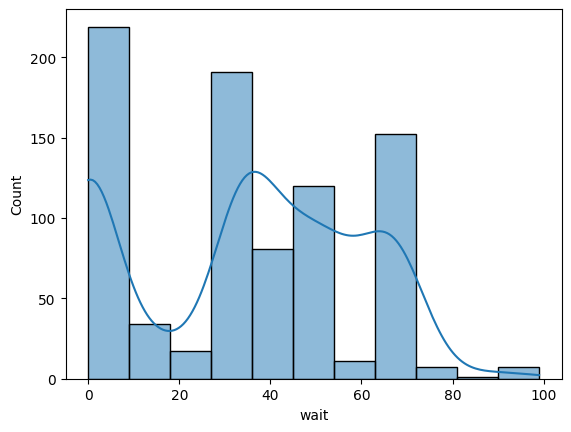

In [58]:
# Univariate Analysis
print("Univariate Analysis (Distribution of 'wait'):")
sns.histplot(df_no_duplicates['wait'], kde=True)
plt.show()

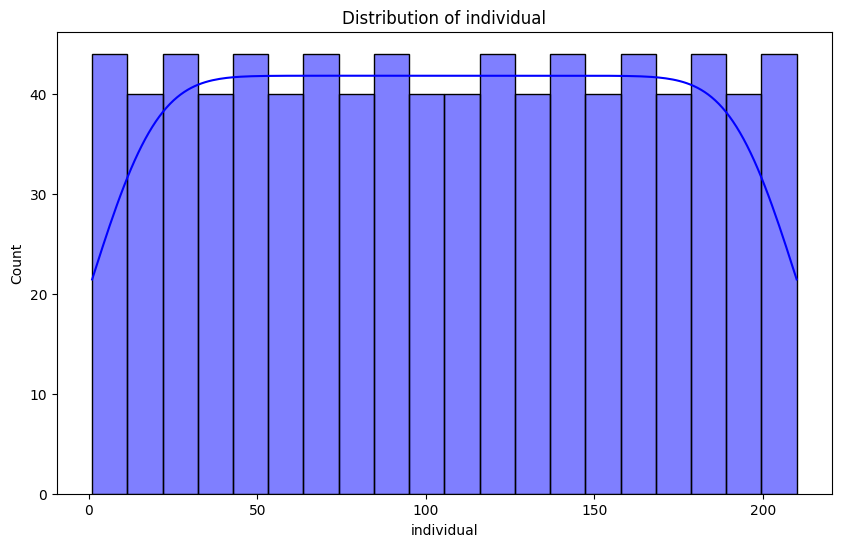

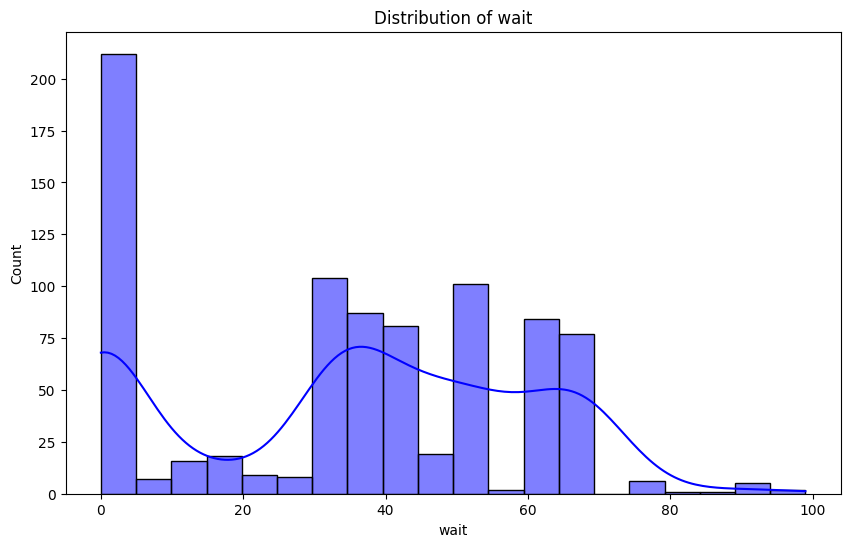

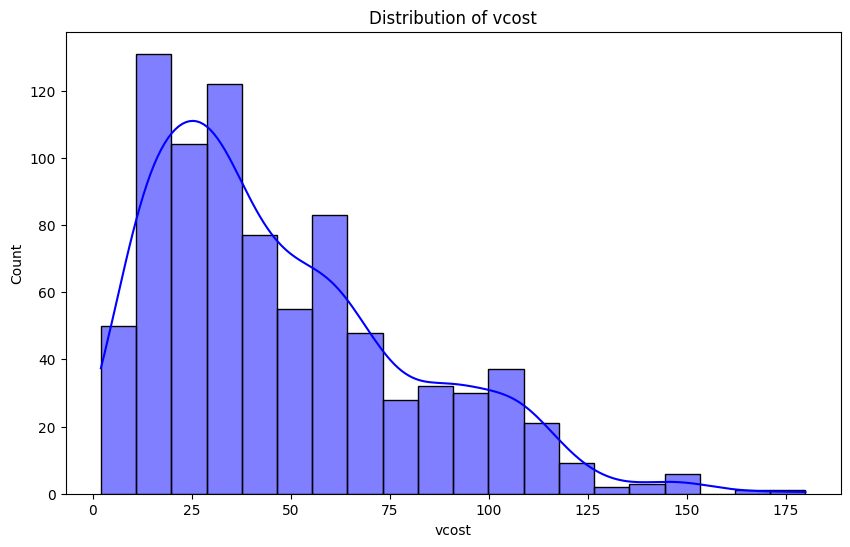

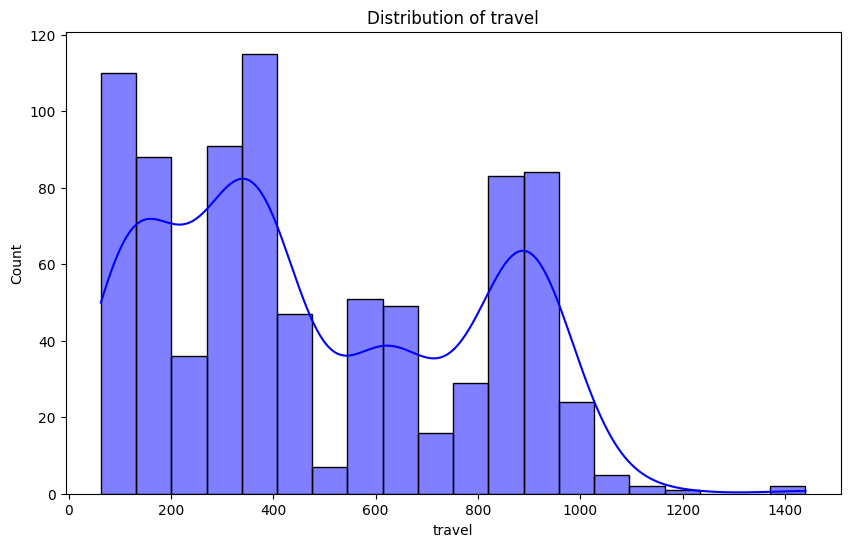

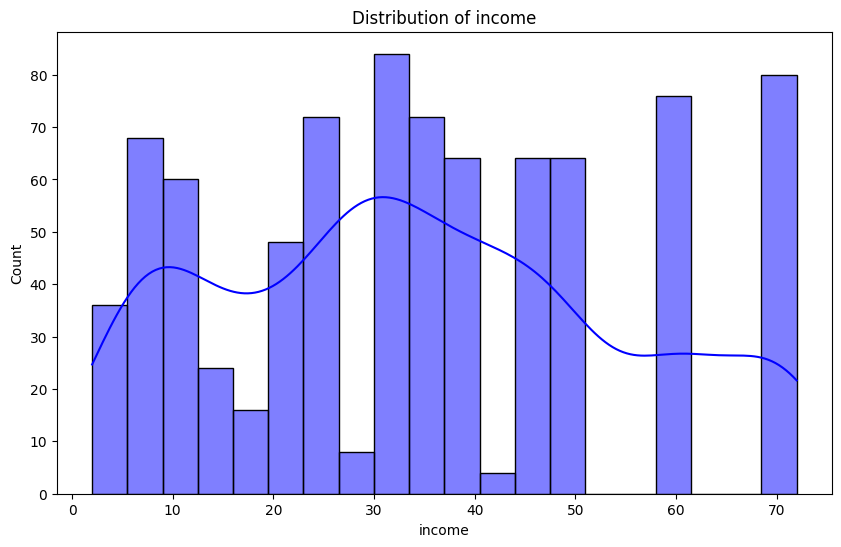

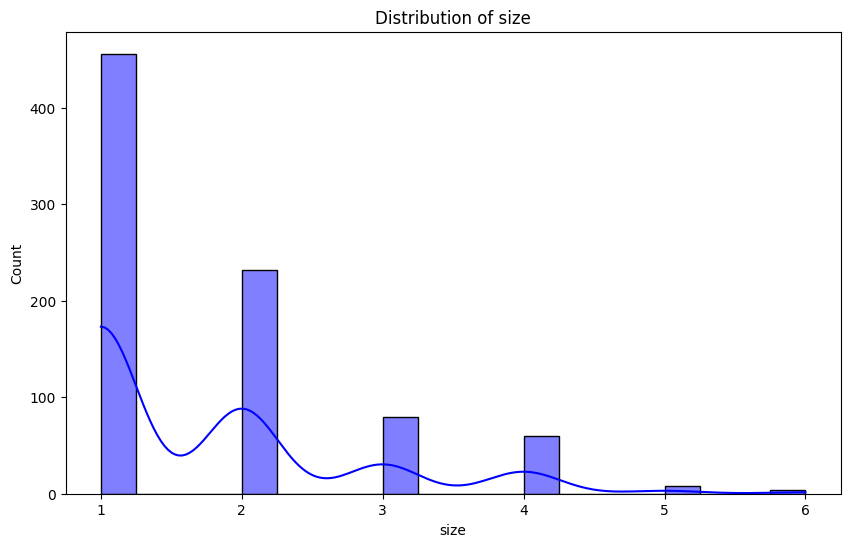

In [59]:
# Univariate Analysis: Distribution plots for numerical columns
numerical_columns = df_no_duplicates.select_dtypes(include=[np.number])

for col in numerical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_no_duplicates[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.show()

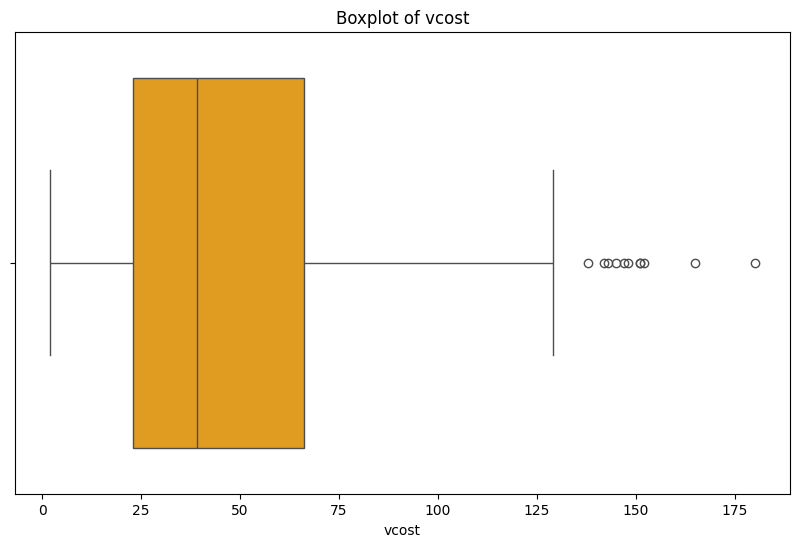

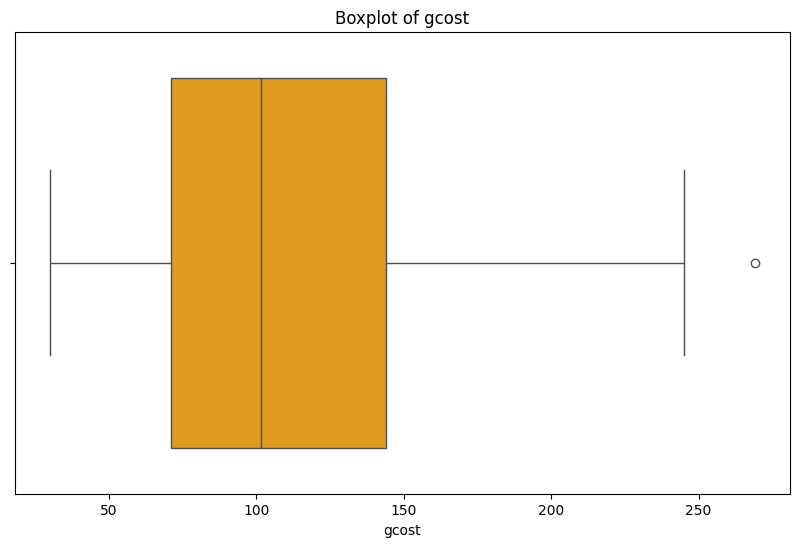

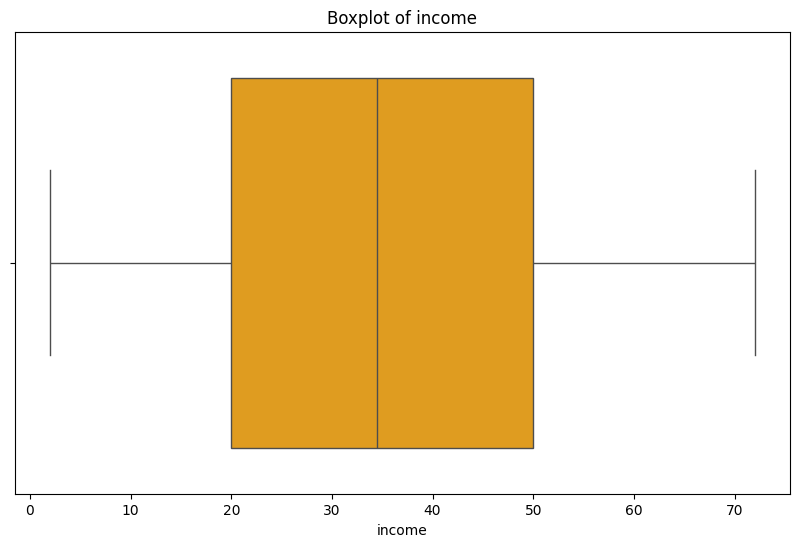

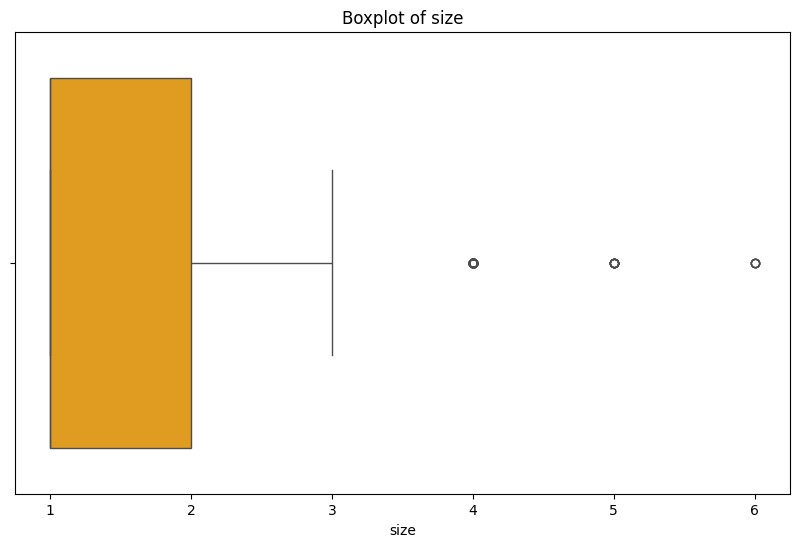

In [60]:
# Univariate Analysis: Boxplot for numerical columns
for col in numerical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_duplicates[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.show()

In [61]:
# Univariate Analysis: Count plot for categorical columns (e.g., 'mode' and 'choice')
categorical_columns = df_no_duplicates.select_dtypes(include=[object])

for col in categorical_columns.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_no_duplicates[col], palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.show()


<ipython-input-61-4da9b0ce4761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_duplicates[col], palette='Set2')


<ipython-input-61-4da9b0ce4761>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_no_duplicates[col], palette='Set2')


<ipython-input-81-7cf000932a3d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='size', data=df_no_duplicates, palette='Set2')


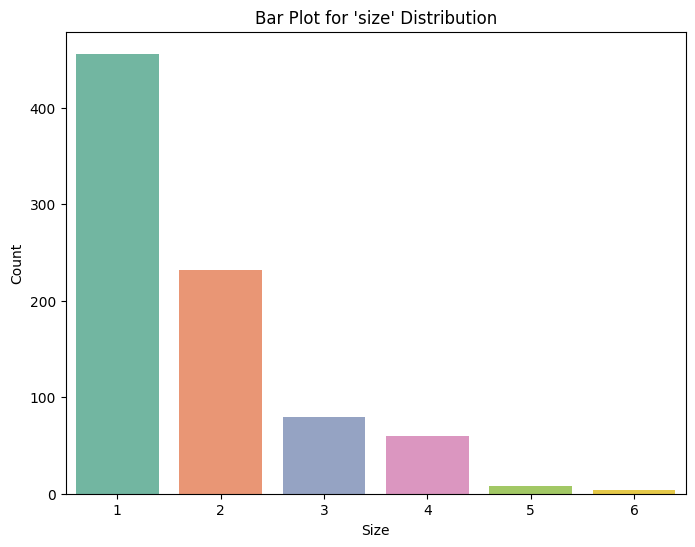

In [81]:
# Bar plot for 'size' column
plt.figure(figsize=(8, 6))
sns.countplot(x='size', data=df_no_duplicates, palette='Set2')
plt.title("Bar Plot for 'size' Distribution")
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()

In [62]:
# Descriptive statistics for numerical columns
print("Descriptive Statistics:")
print(df_no_duplicates.describe())


Descriptive Statistics:
       individual        wait       vcost       travel       gcost  \
count  840.000000  840.000000  840.000000   840.000000  840.000000   
mean   105.500000   34.589286   47.760714   486.165476  110.879762   
std     60.657207   24.948608   32.371004   301.439107   47.978353   
min      1.000000    0.000000    2.000000    63.000000   30.000000   
25%     53.000000    0.750000   23.000000   234.000000   71.000000   
50%    105.500000   35.000000   39.000000   397.000000  101.500000   
75%    158.000000   53.000000   66.250000   795.500000  144.000000   
max    210.000000   99.000000  180.000000  1440.000000  269.000000   

           income        size  
count  840.000000  840.000000  
mean    34.547619    1.742857  
std     19.676044    1.010350  
min      2.000000    1.000000  
25%     20.000000    1.000000  
50%     34.500000    1.000000  
75%     50.000000    2.000000  
max     72.000000    6.000000  



Bivariate Analysis (wait vs vcost):


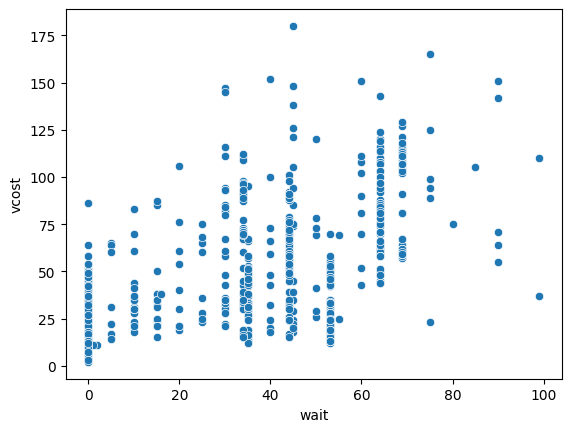

In [63]:
# Bivariate Analysis
# Relationship between 'wait' and 'vcost'
print("Bivariate Analysis (wait vs vcost):")
sns.scatterplot(x='wait', y='vcost', data=df_no_duplicates)
plt.show()

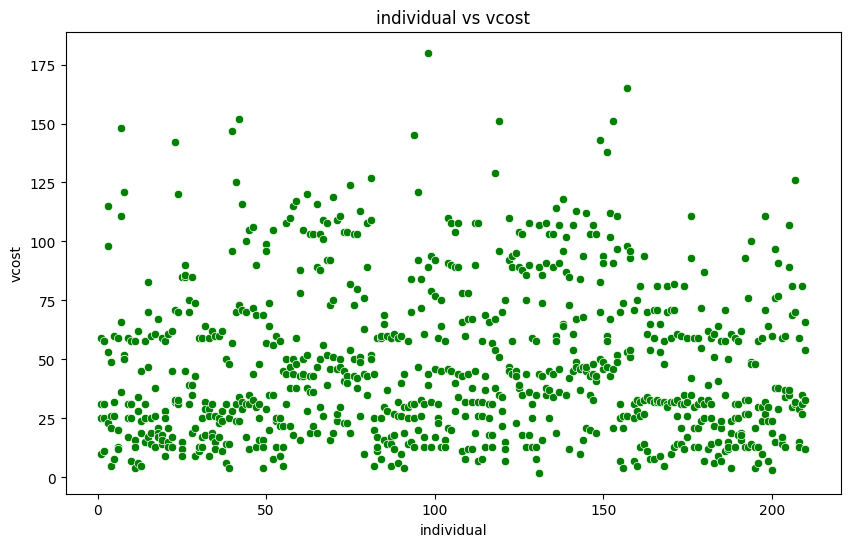

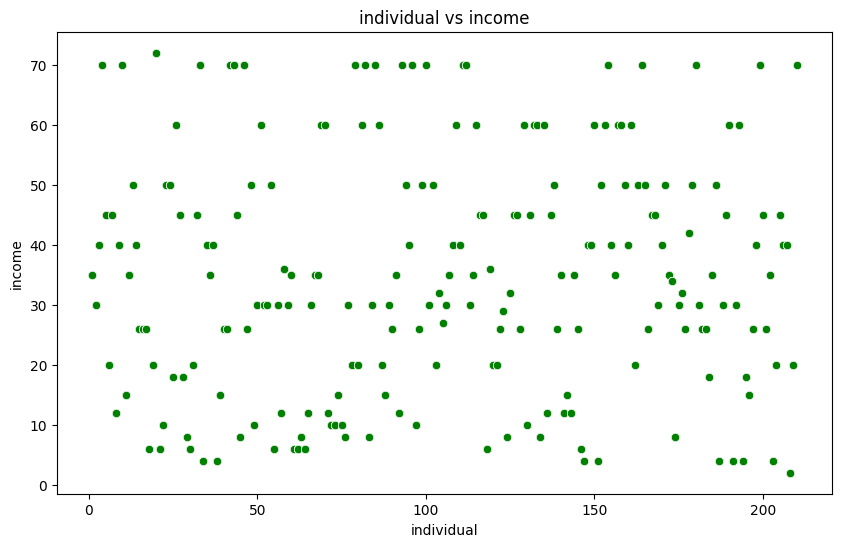

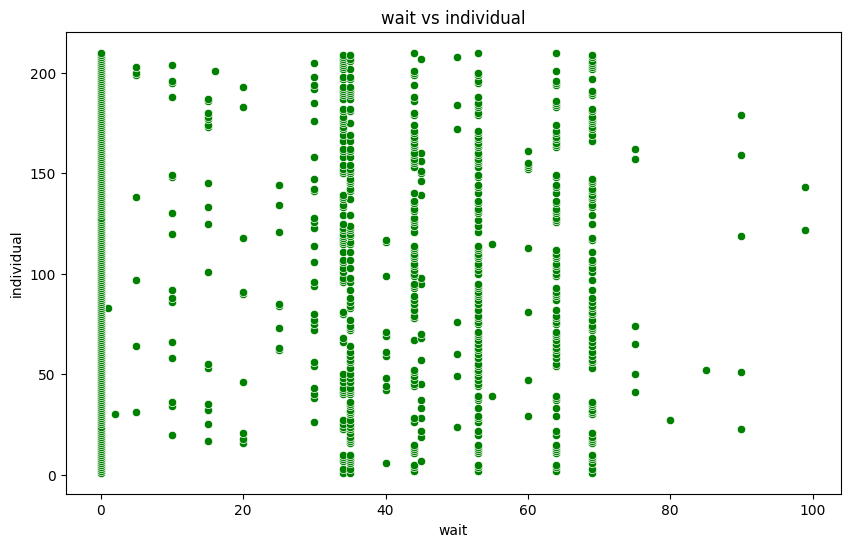

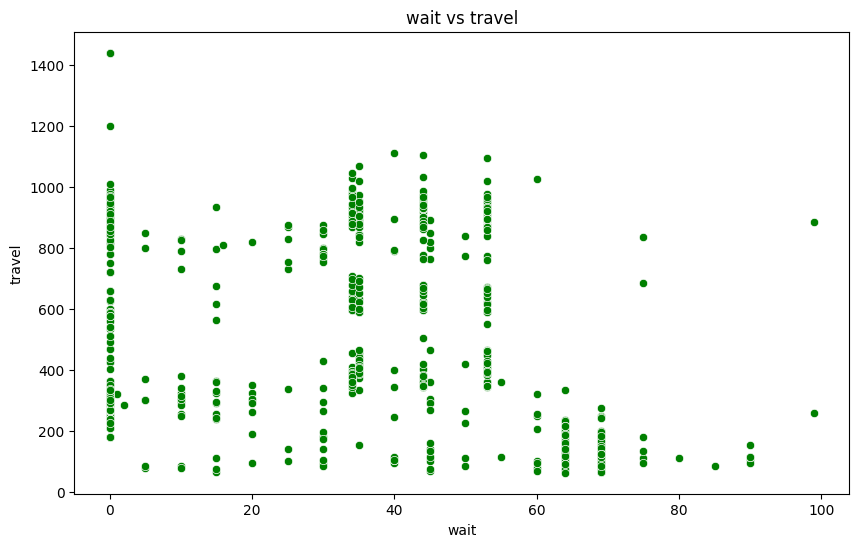

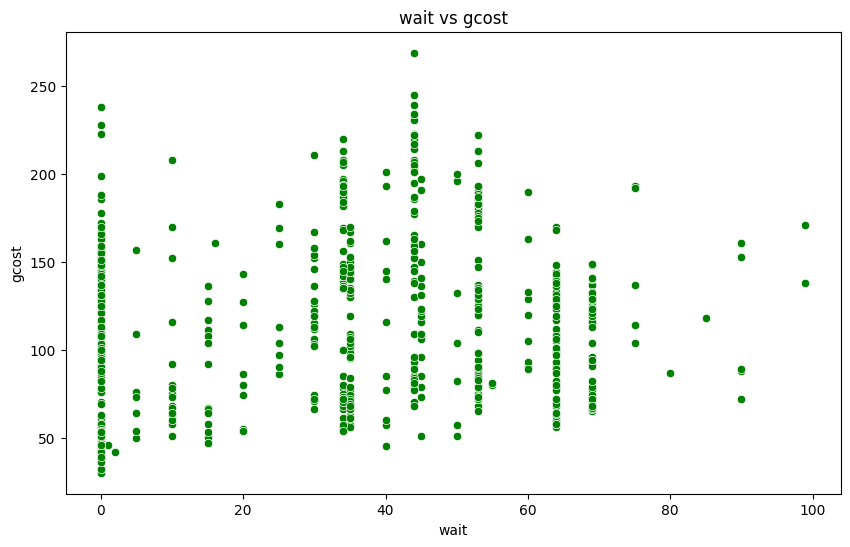

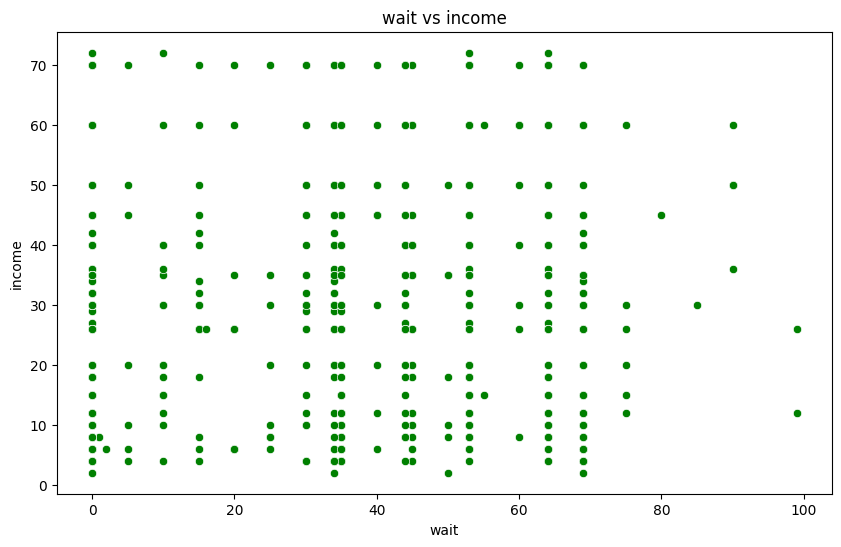

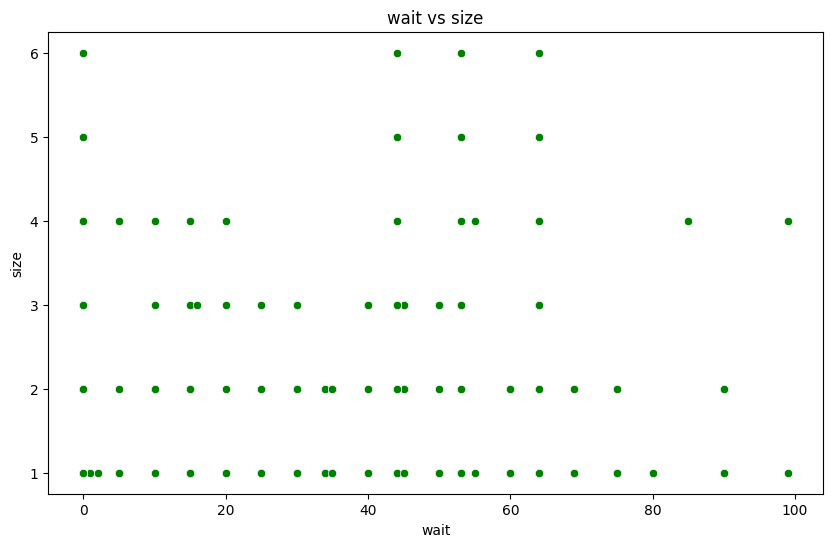

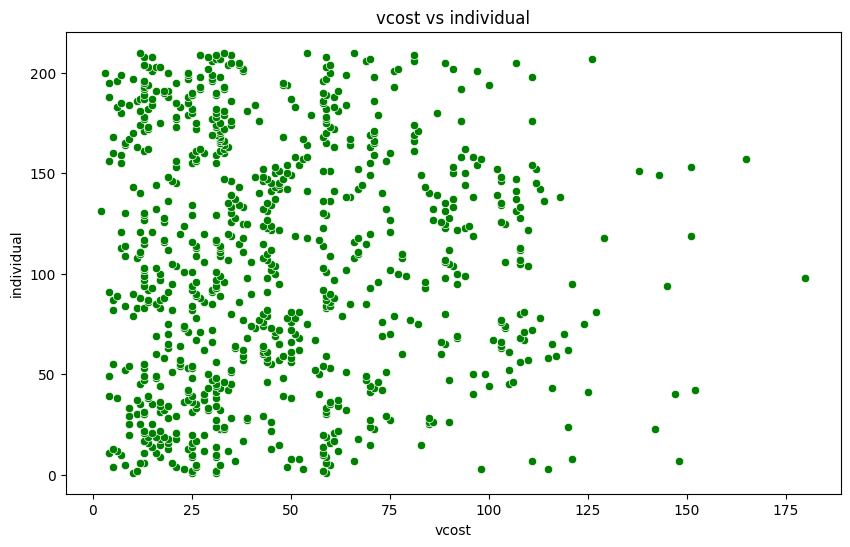

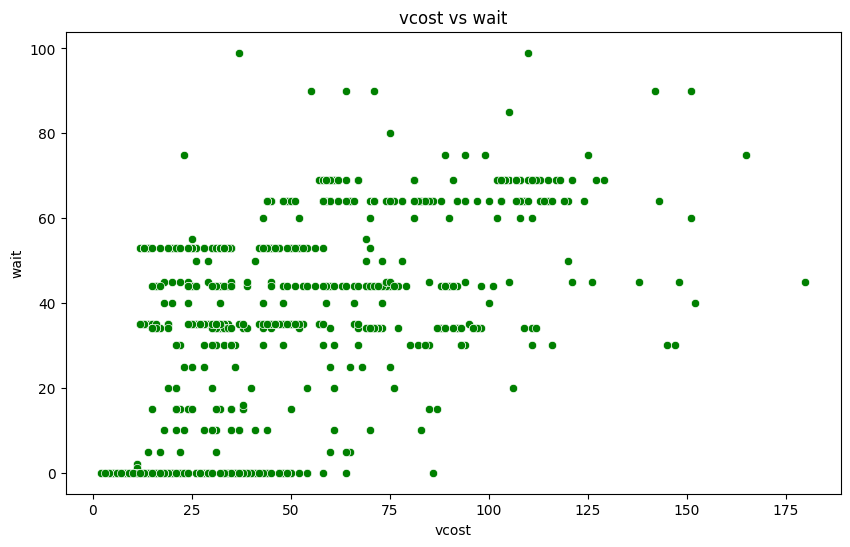

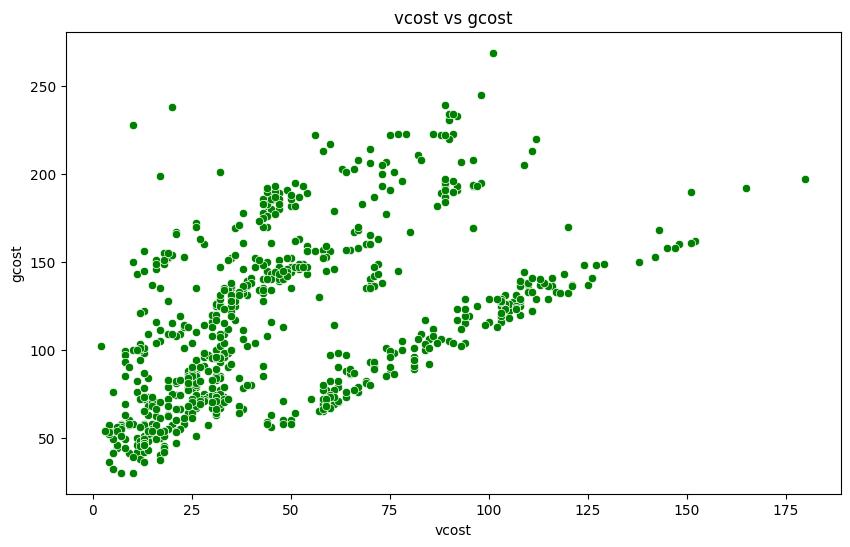

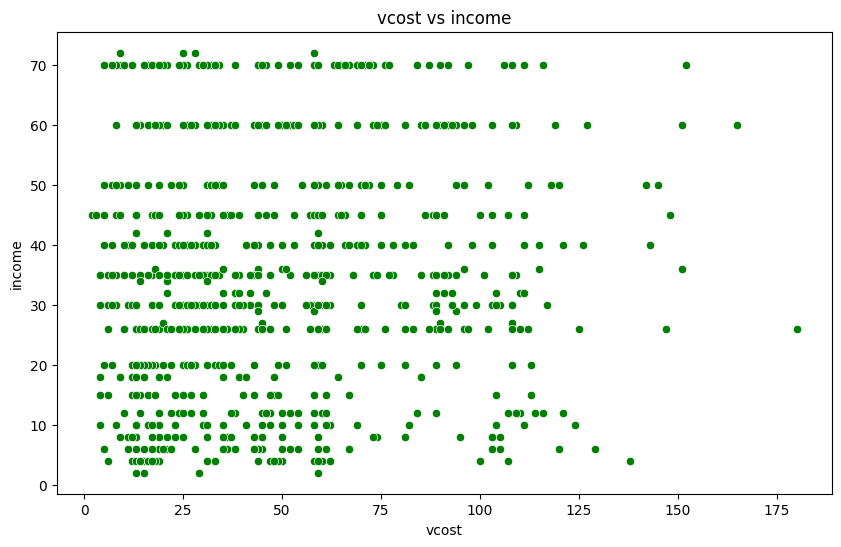

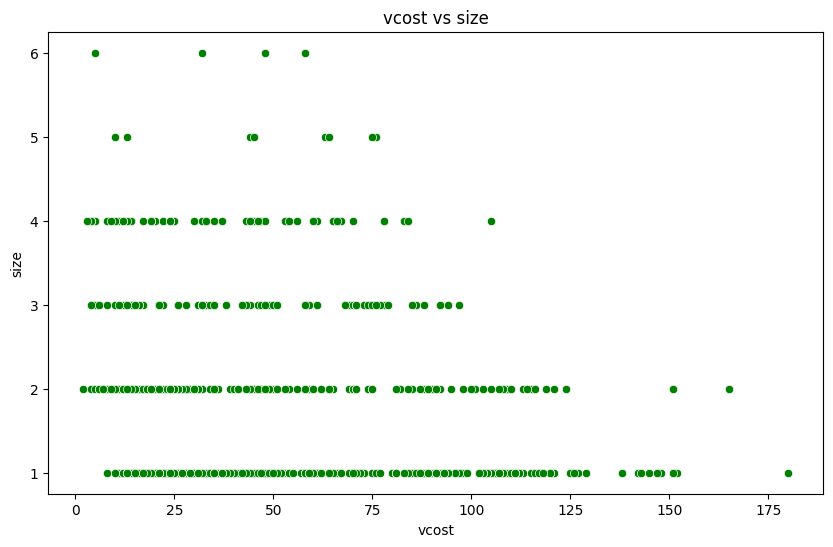

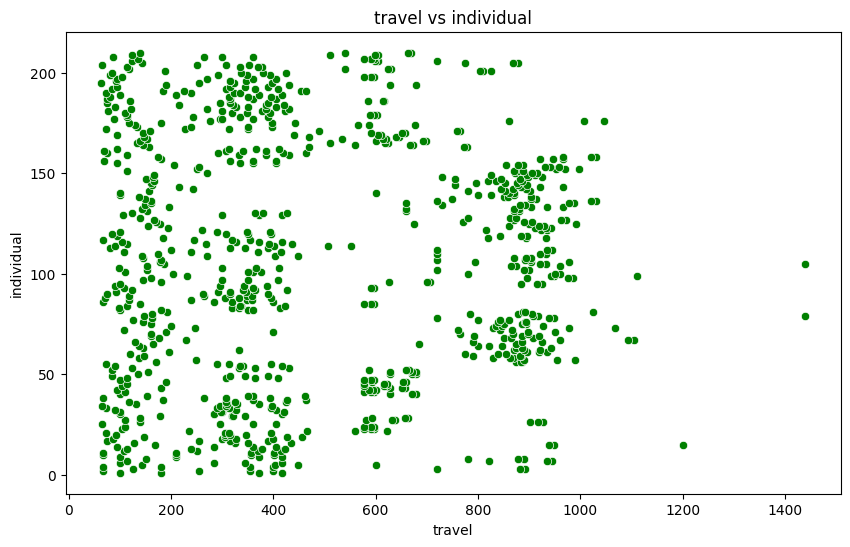

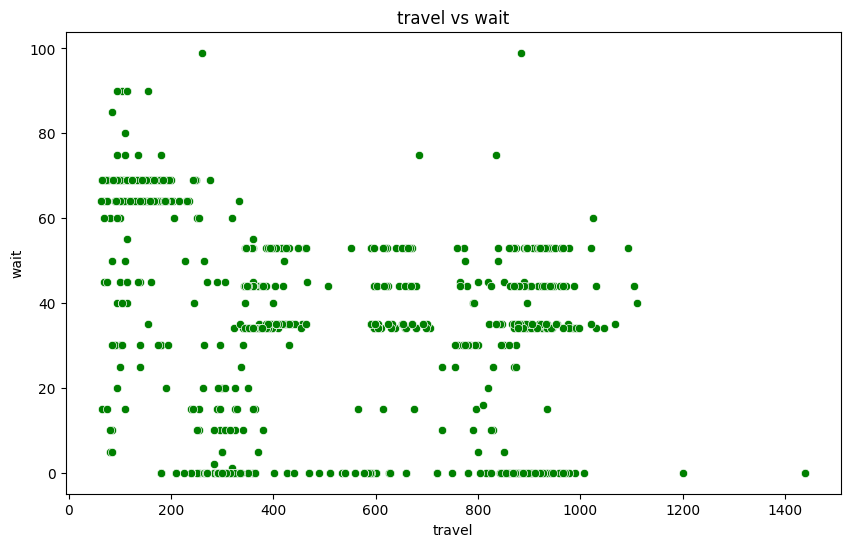

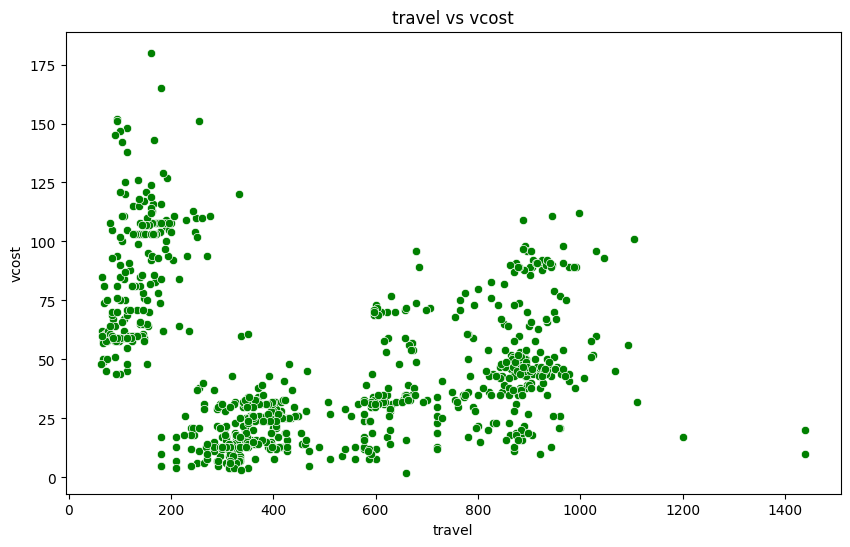

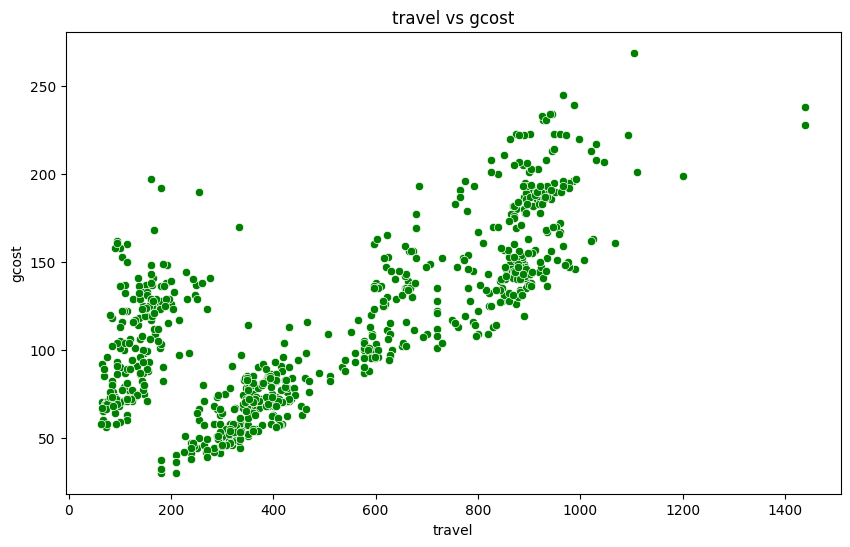

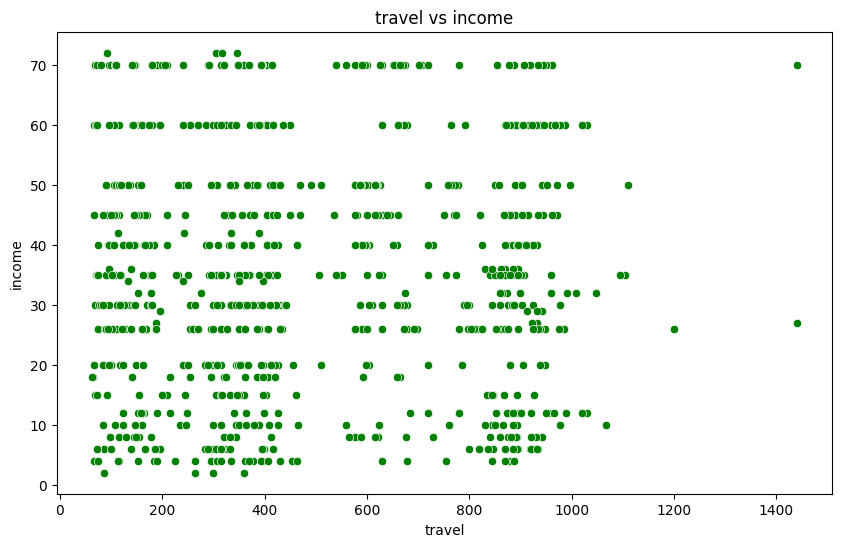

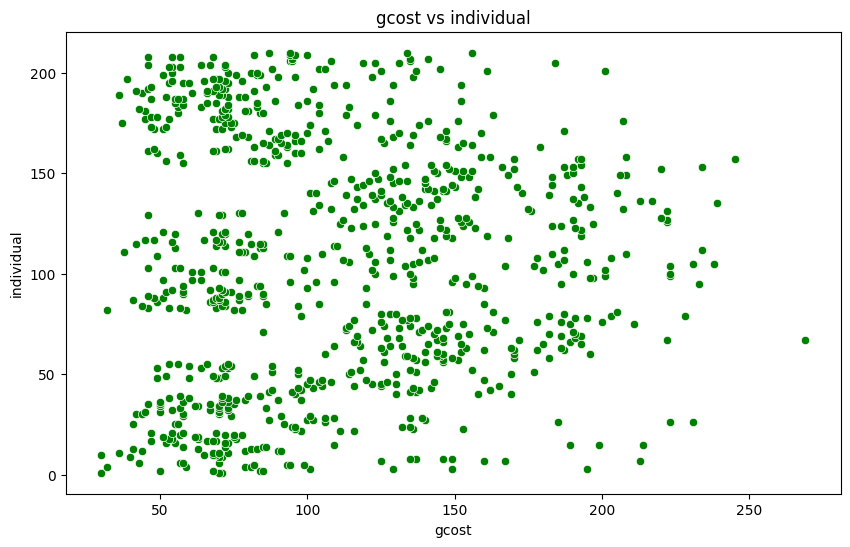

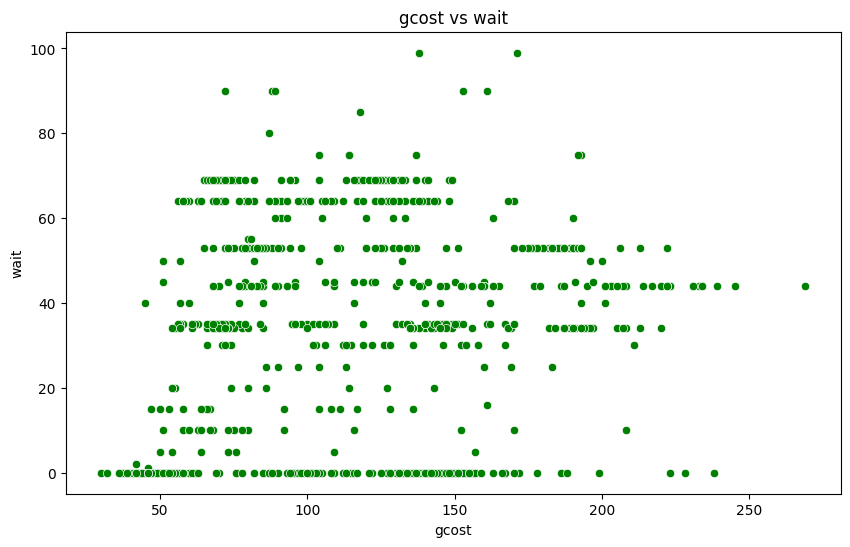

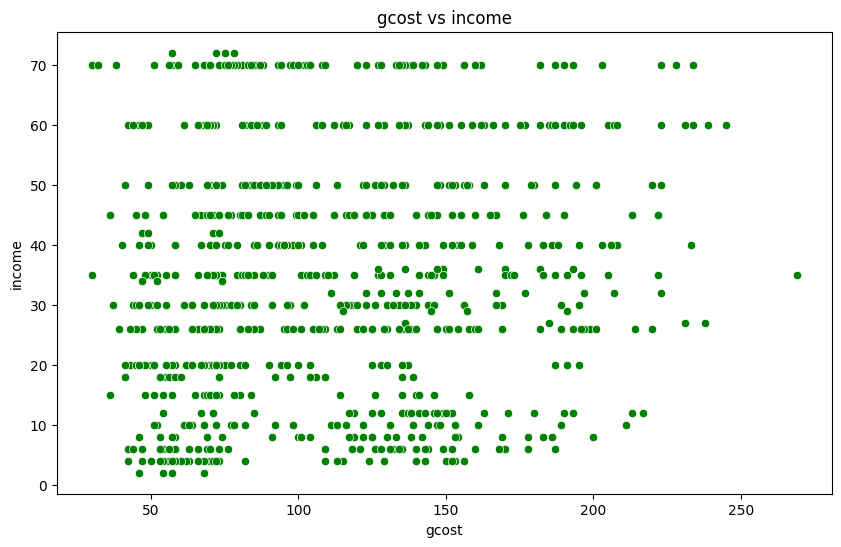

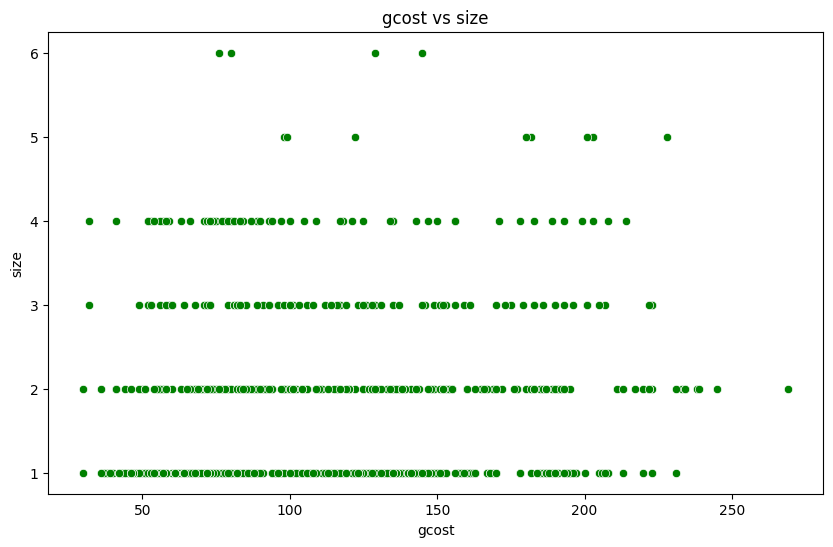

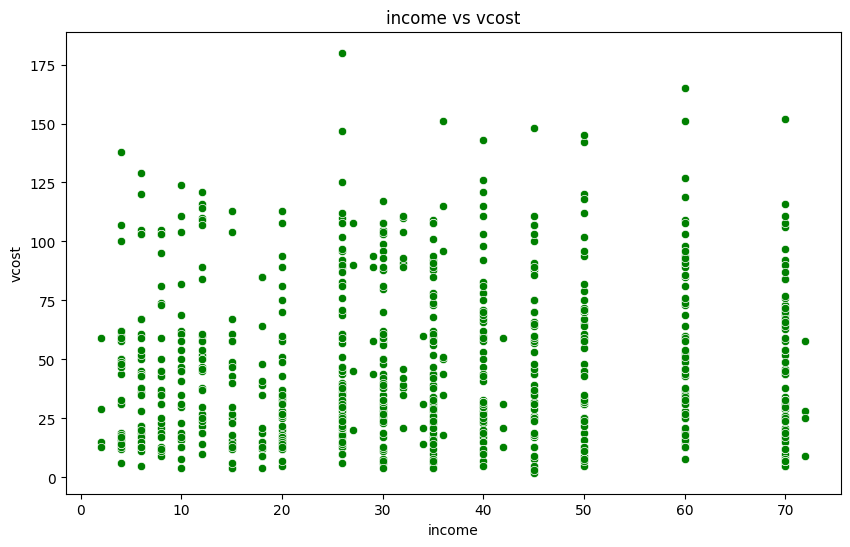

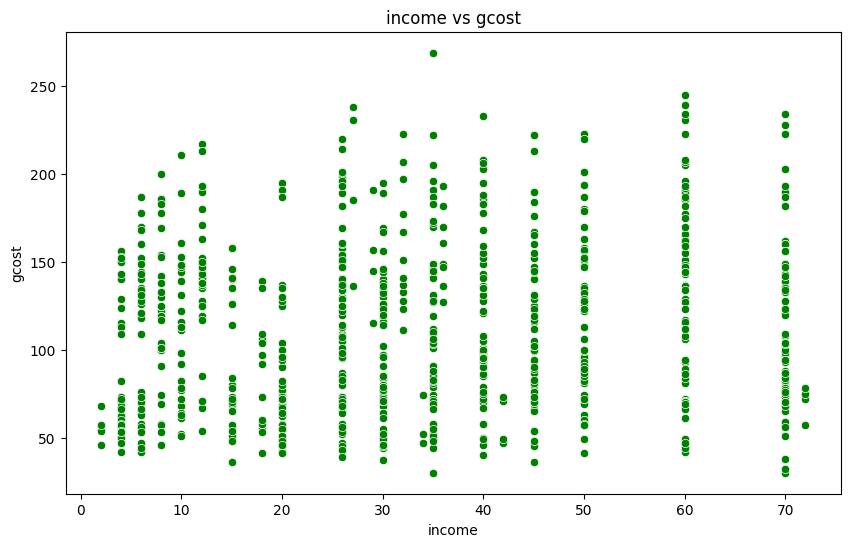

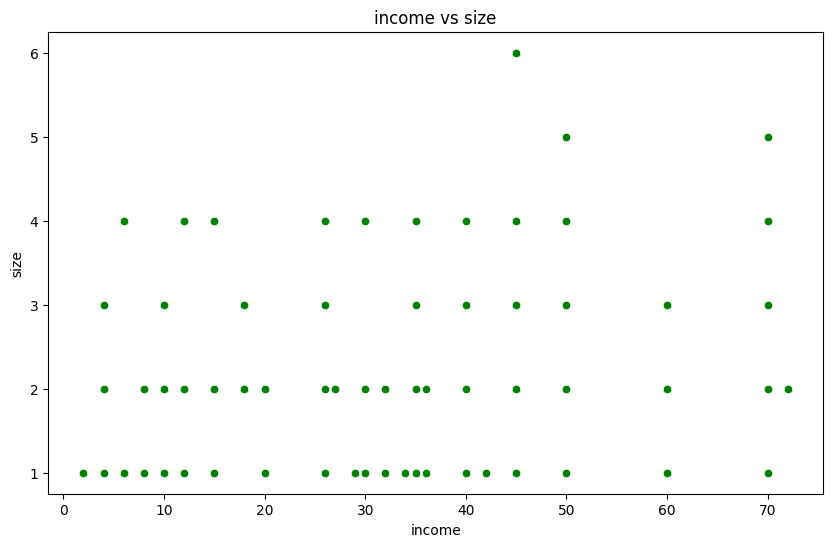

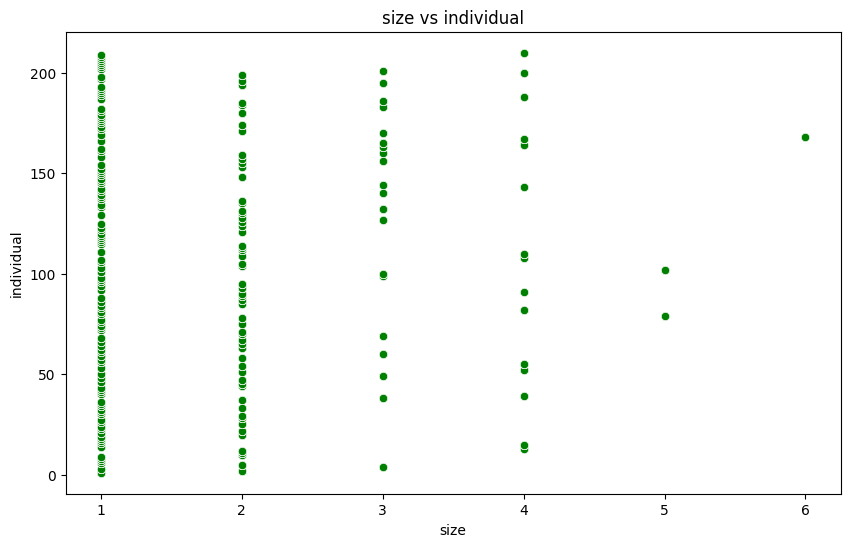

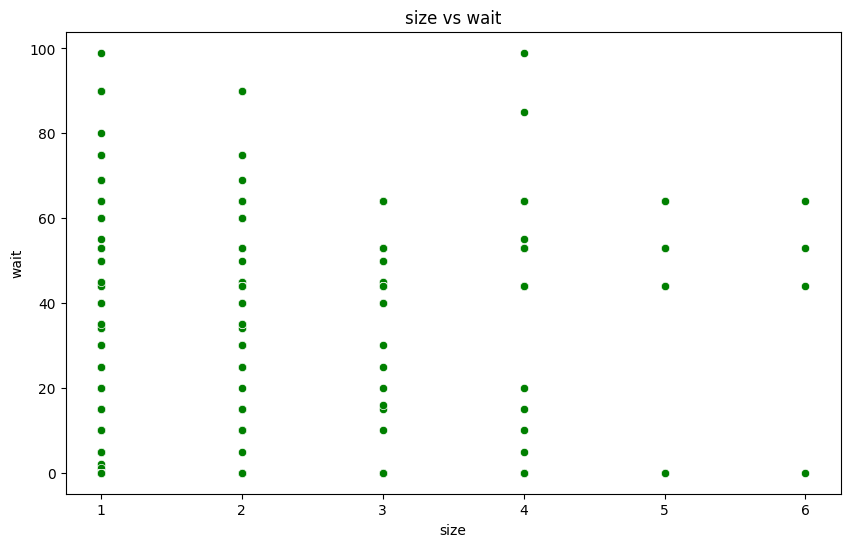

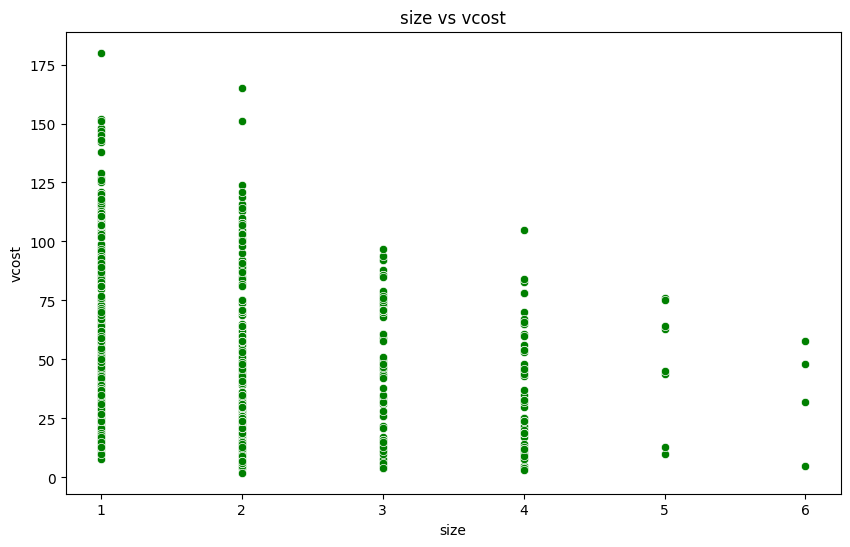

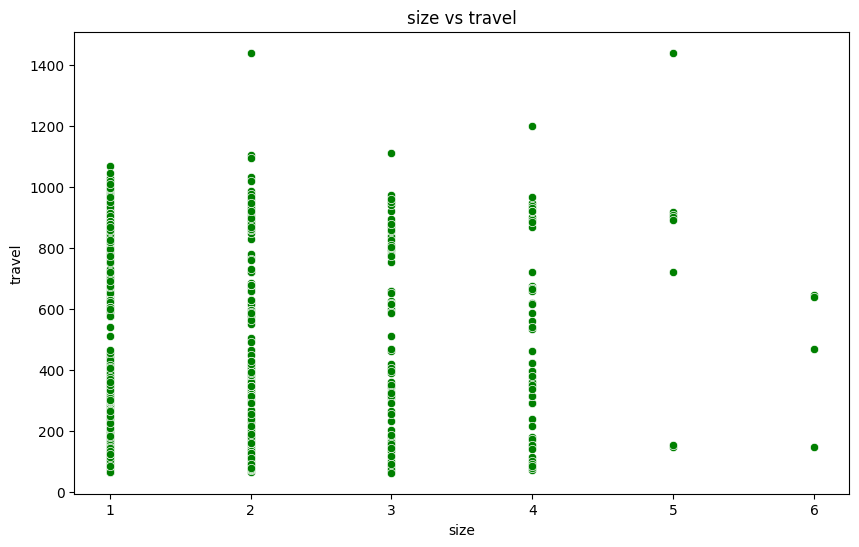

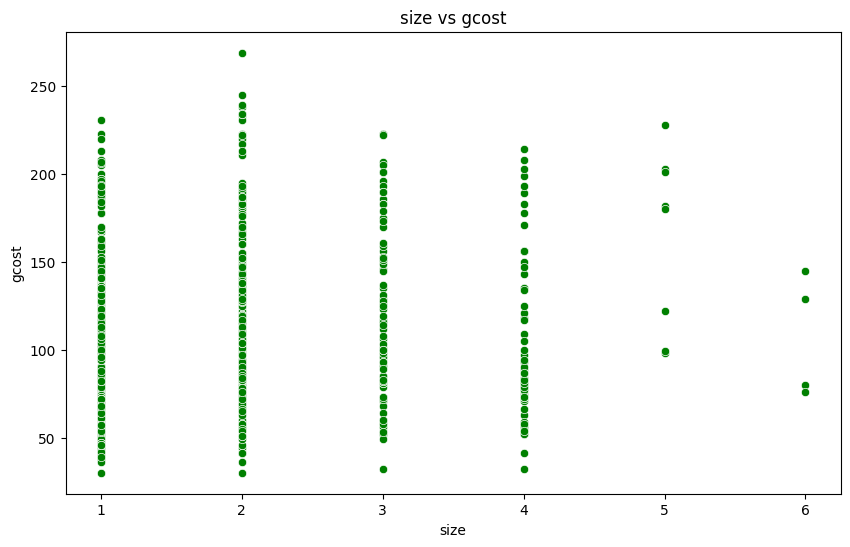

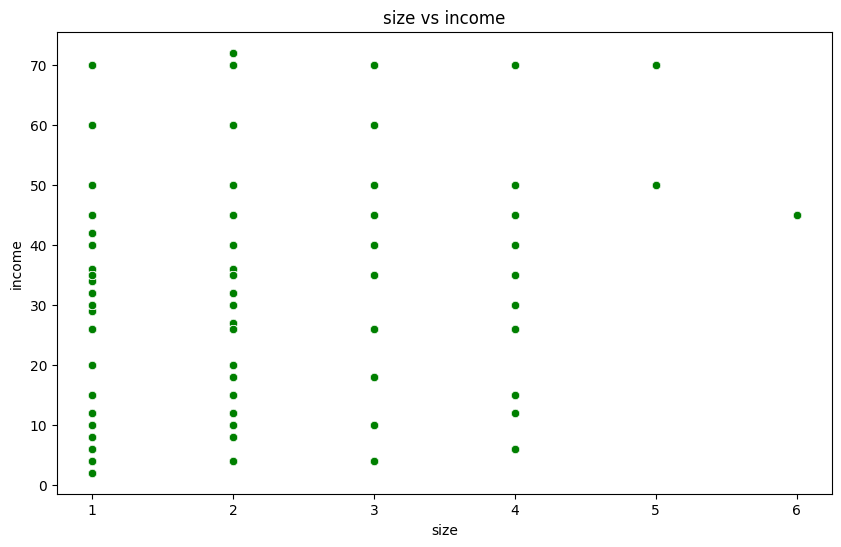

In [64]:
# Bivariate Analysis: Scatter plots between numerical pairs
for col1 in numerical_columns.columns:
    for col2 in numerical_columns.columns:
        if col1 != col2:
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df_no_duplicates[col1], y=df_no_duplicates[col2], color='green')
            plt.title(f'{col1} vs {col2}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

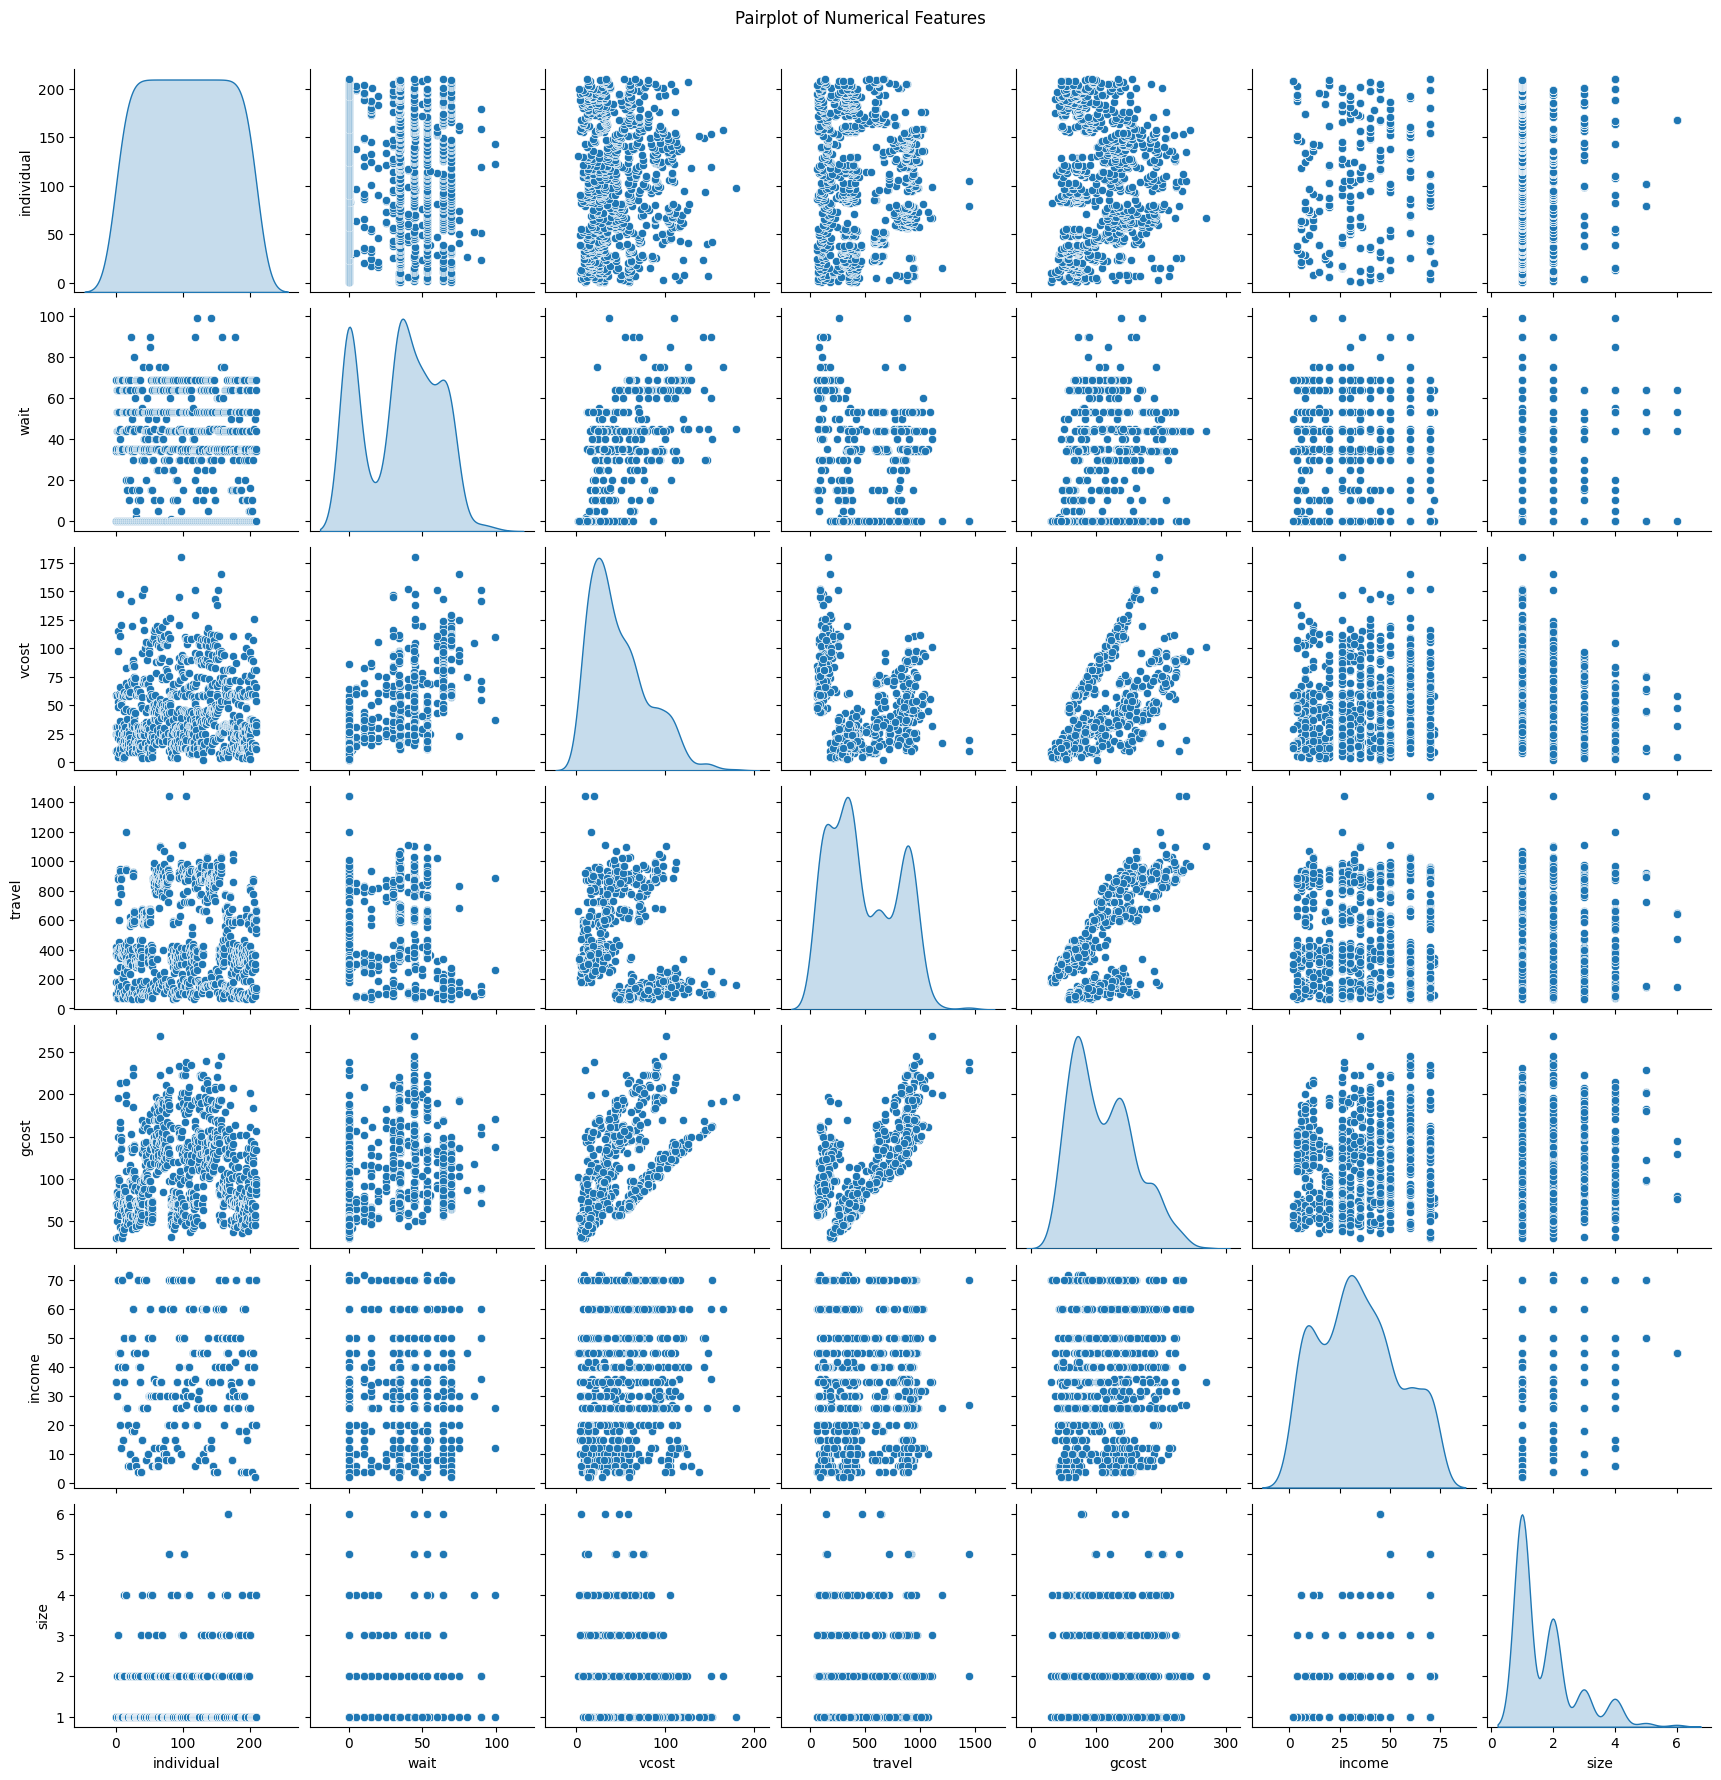

In [65]:
# Bivariate Analysis: Pairplot for numerical columns
sns.pairplot(df_no_duplicates[numerical_columns.columns], diag_kind='kde', palette='coolwarm')
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()


<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


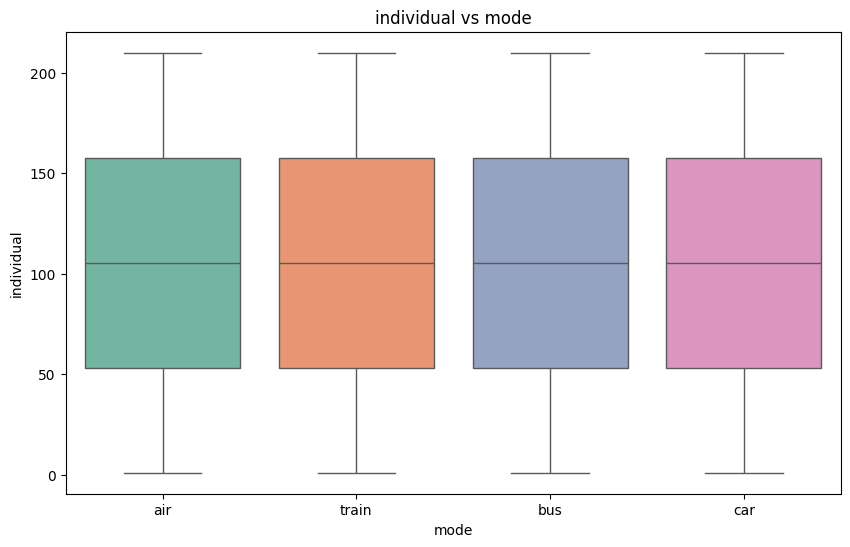

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


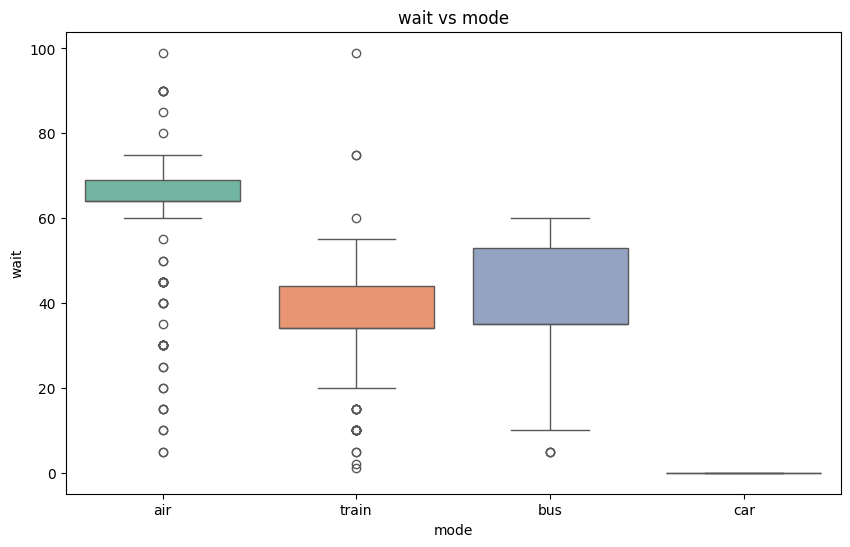

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


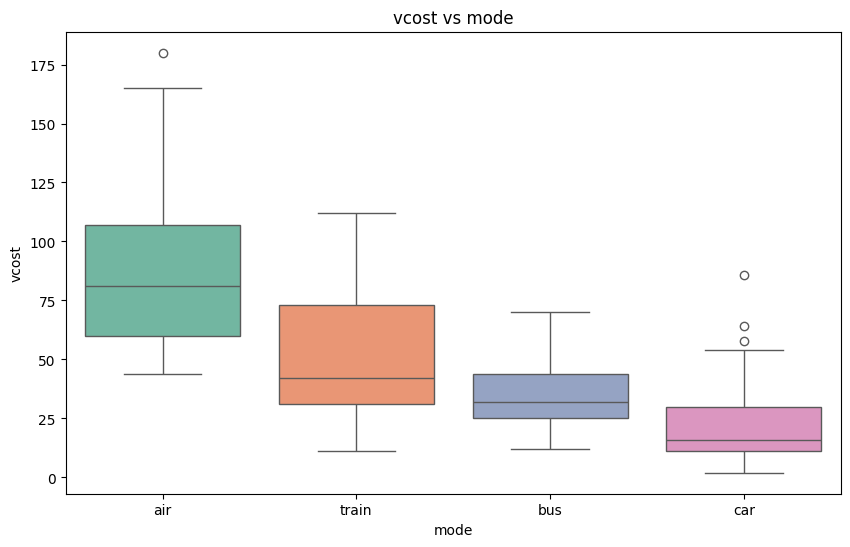

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


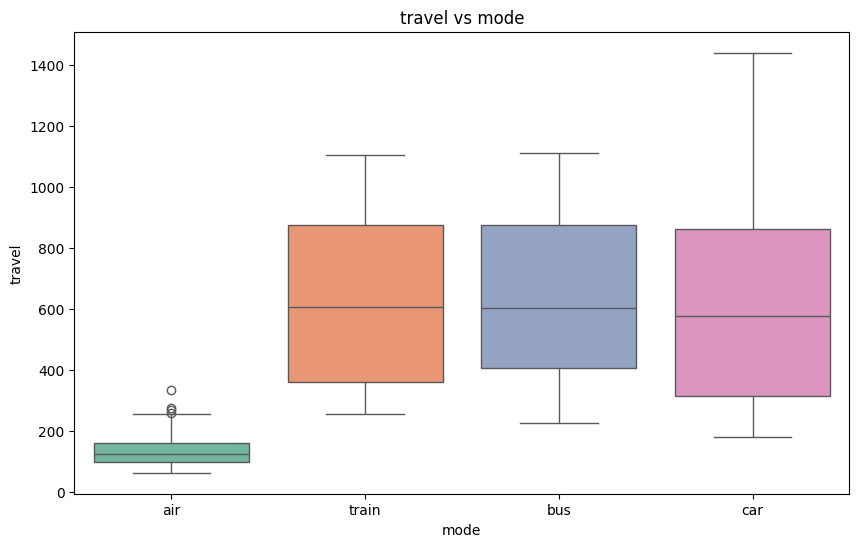

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


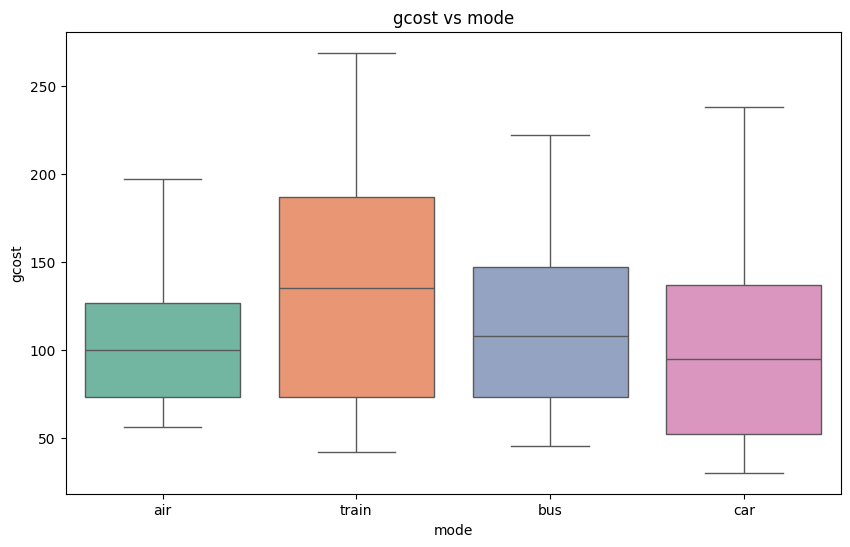

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


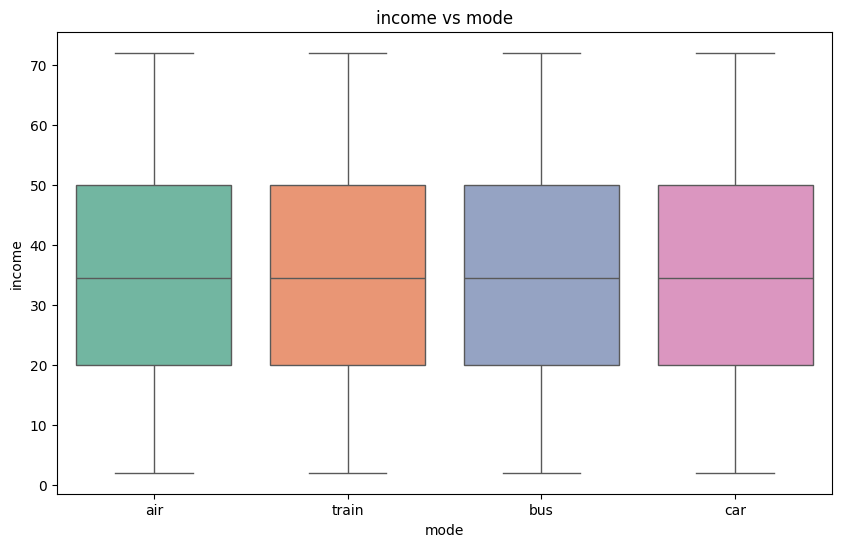

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


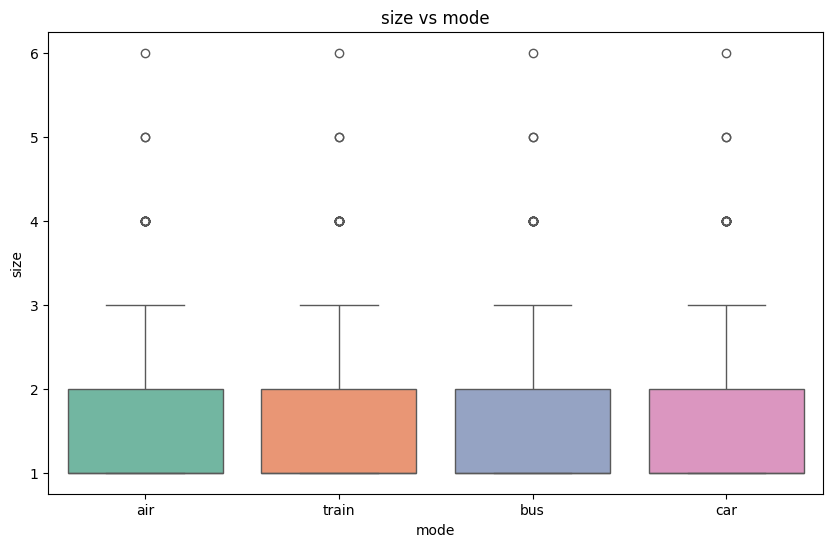

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


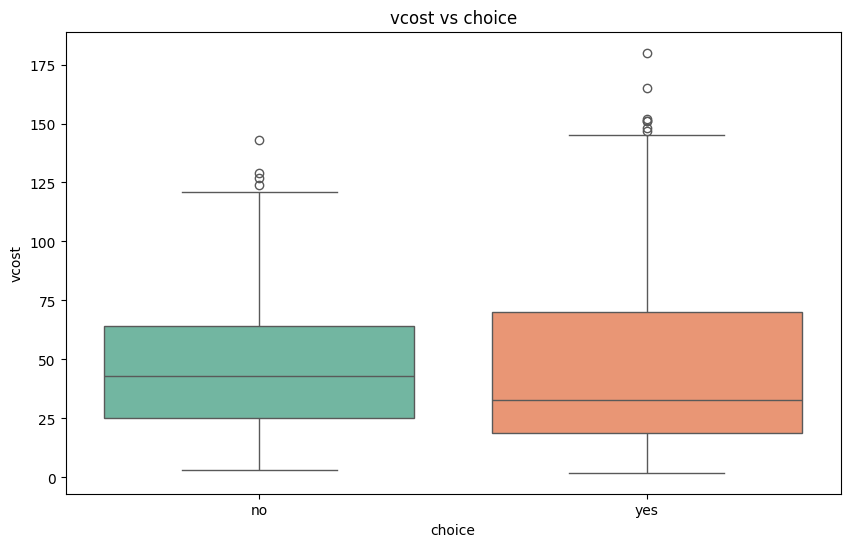

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


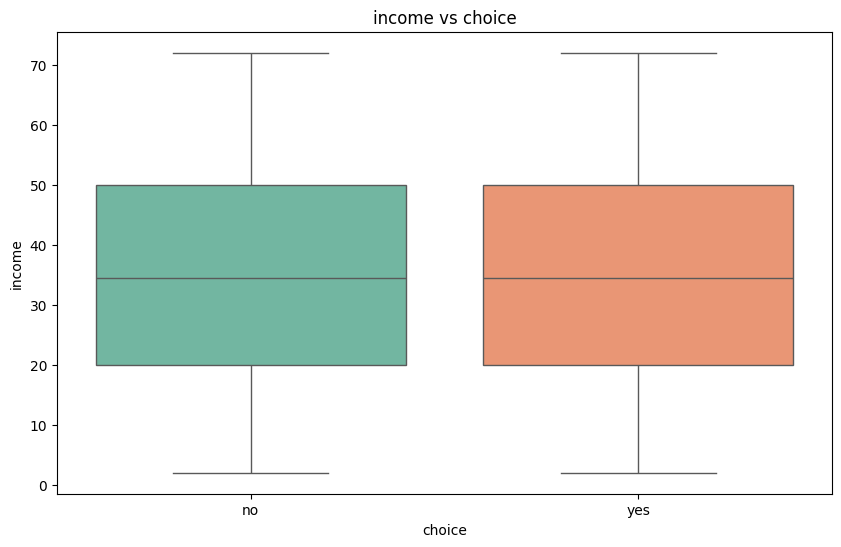

<ipython-input-66-72ceb06f75f1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


In [66]:
# Bivariate Analysis: Boxplot for categorical vs numerical columns
for col in categorical_columns.columns:
    for num_col in numerical_columns.columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')
        plt.title(f'{num_col} vs {col}')
        plt.show()


Correlation Matrix:


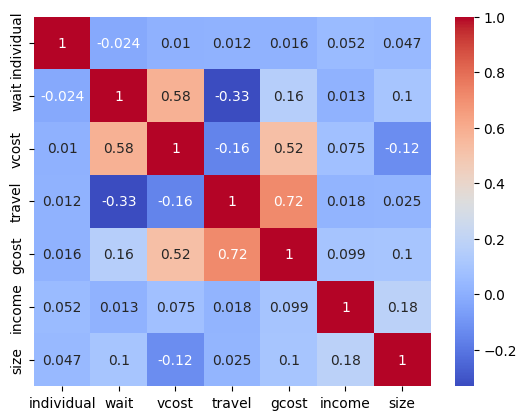

In [67]:
# Correlation between numerical columns
numerical_columns = df_no_duplicates.select_dtypes(include=[np.number])
print("\nCorrelation Matrix:")
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.show()

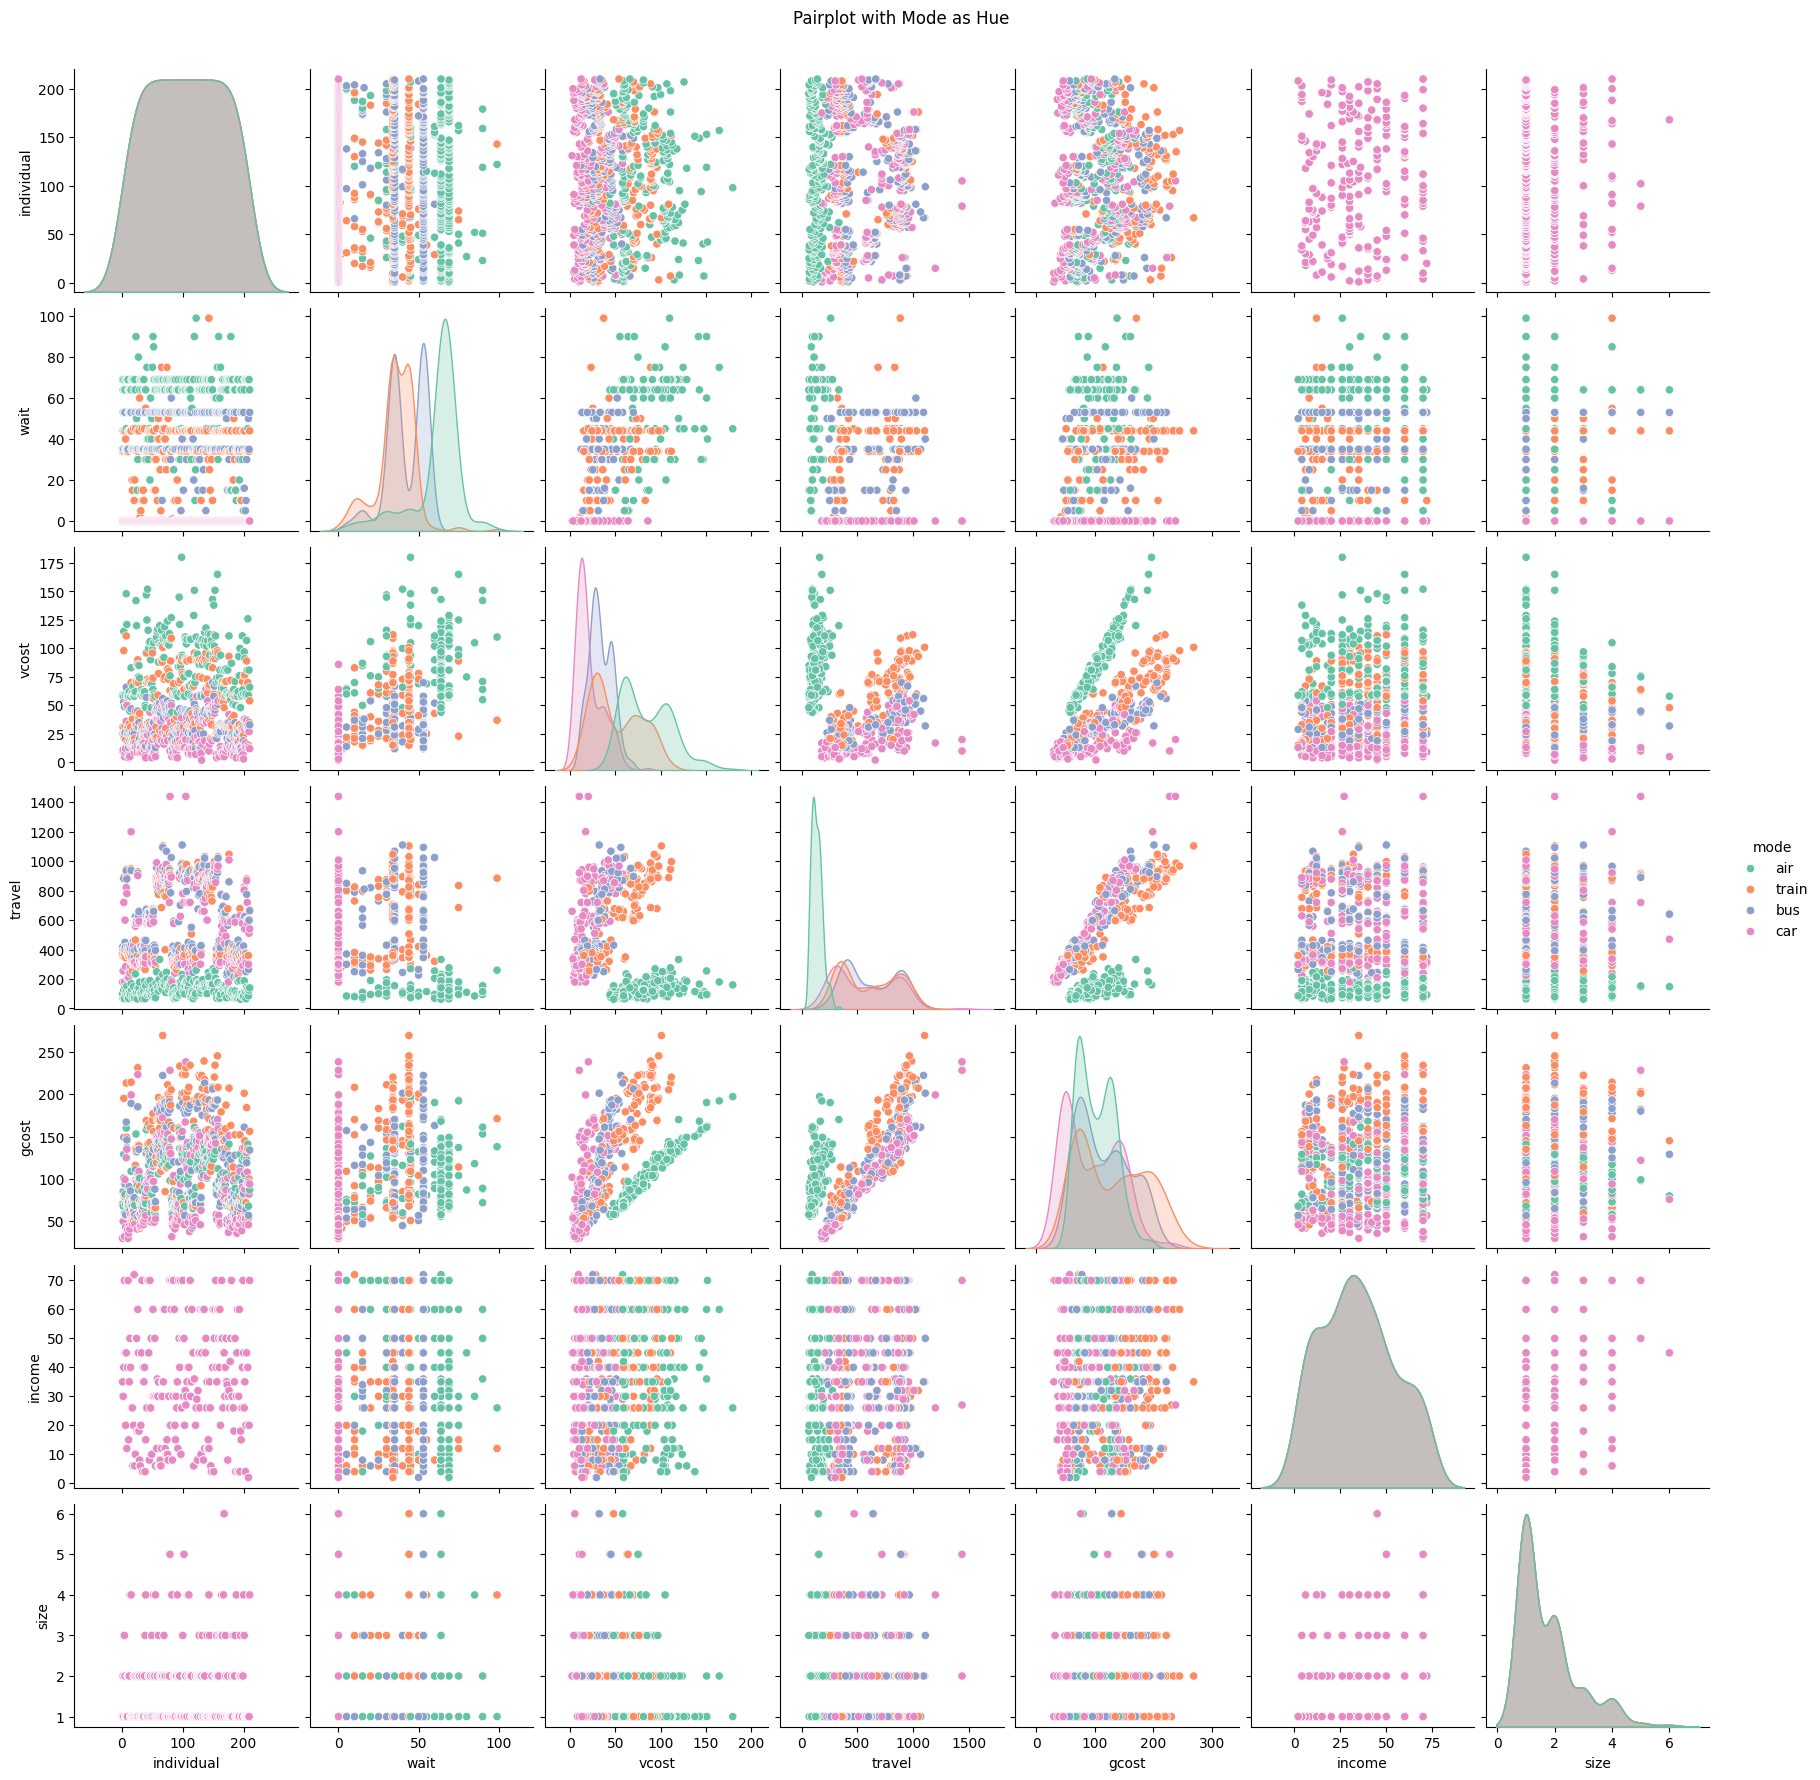

In [68]:
# Multivariate Analysis: Pairplot with hue (using categorical variable)
sns.pairplot(df_no_duplicates, hue='mode', diag_kind='kde', palette='Set2')
plt.suptitle("Pairplot with Mode as Hue", y=1.02)
plt.show()

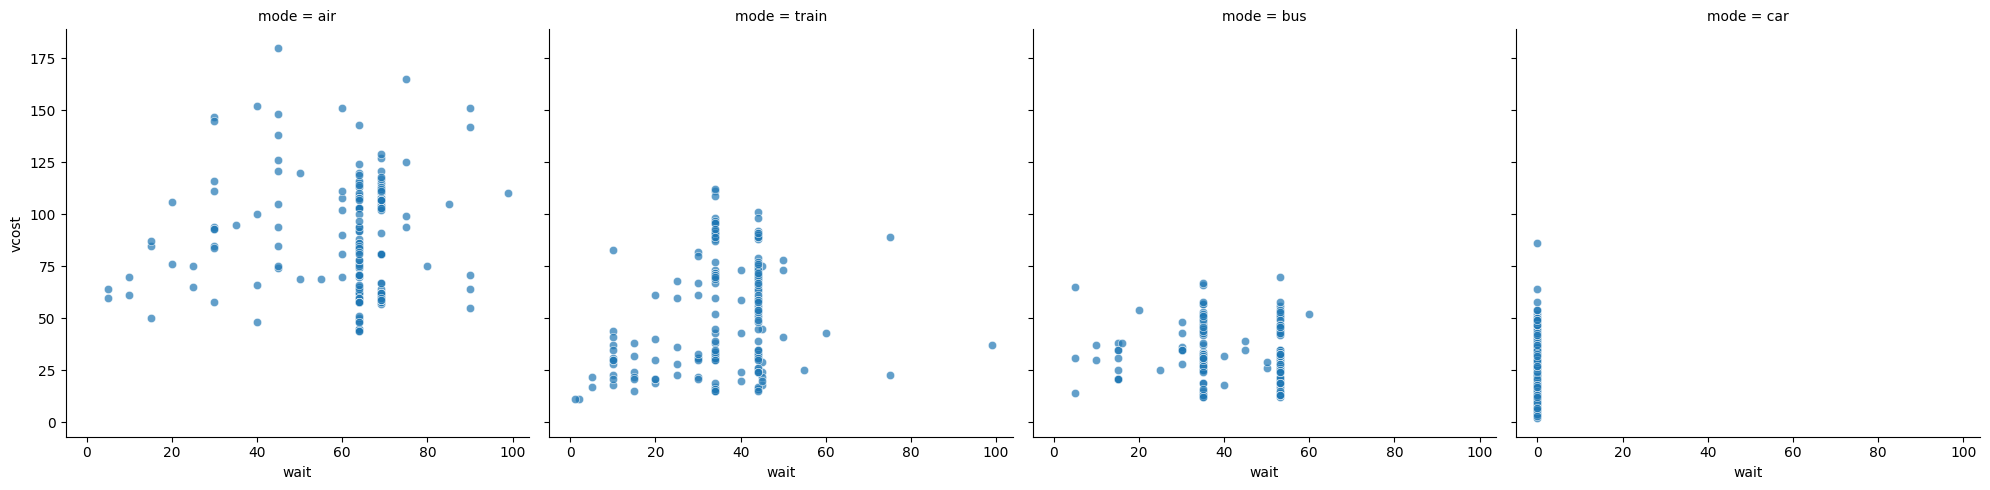

In [45]:
# Multivariate Analysis: FacetGrid for different categories (e.g., mode)
g = sns.FacetGrid(df_no_duplicates, col="mode", height=5)
g.map(sns.scatterplot, "wait", "vcost", alpha=.7)
plt.show()

<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


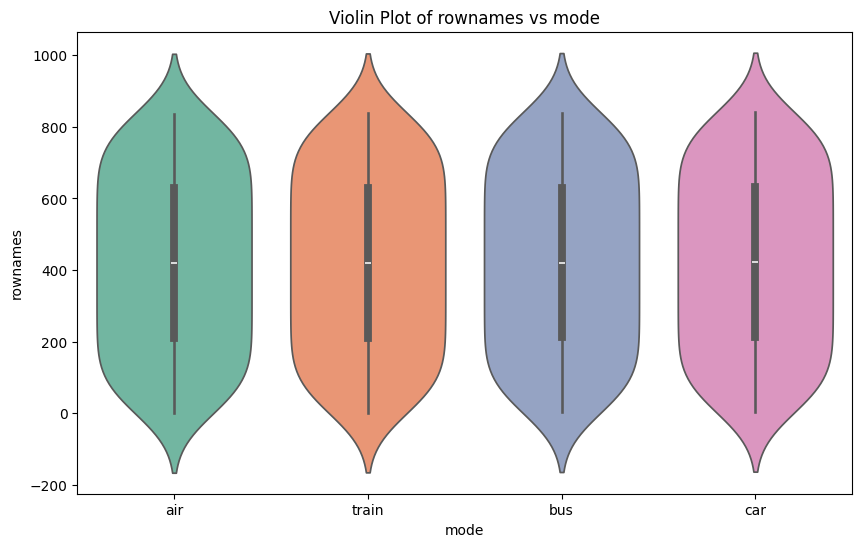

<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


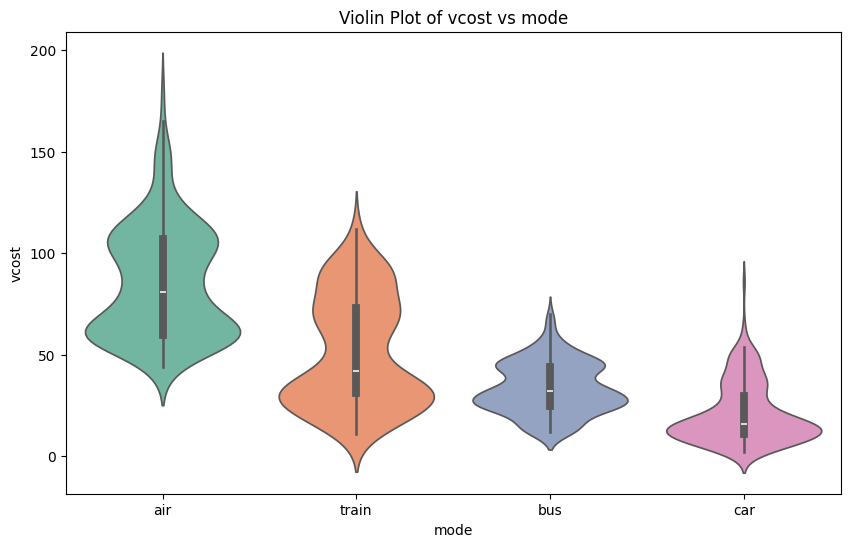

<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


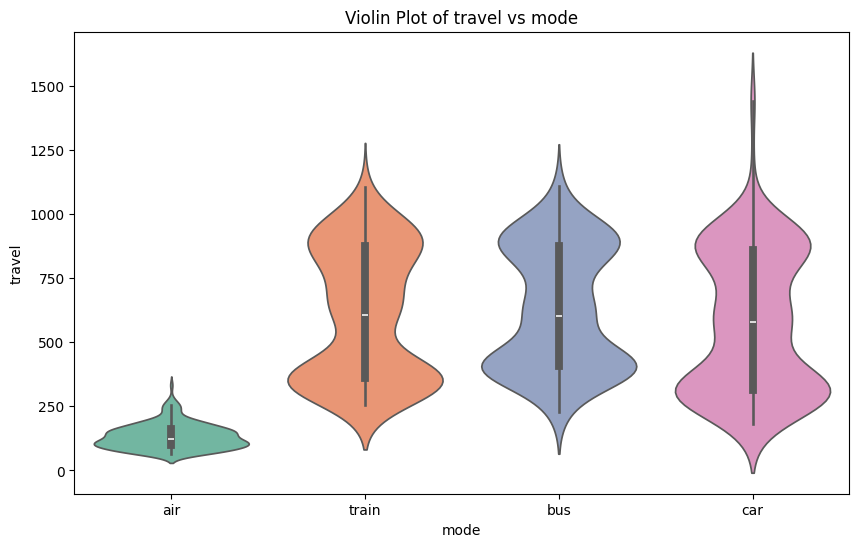

<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


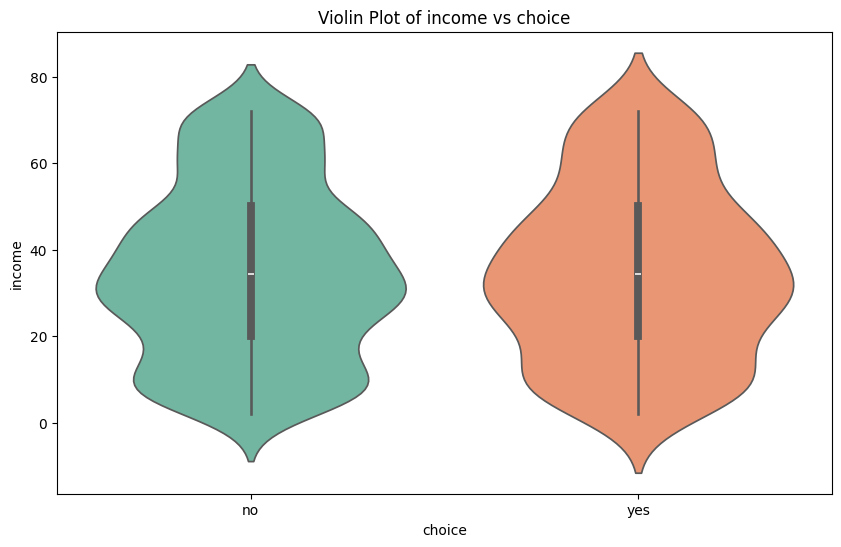

<ipython-input-46-c5885fe07adb>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')


In [46]:
# Violin Plot for numerical vs categorical variables
for col in categorical_columns.columns:
    for num_col in numerical_columns.columns:
        plt.figure(figsize=(10, 6))
        sns.violinplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], palette='Set2')
        plt.title(f'Violin Plot of {num_col} vs {col}')
        plt.show()


<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


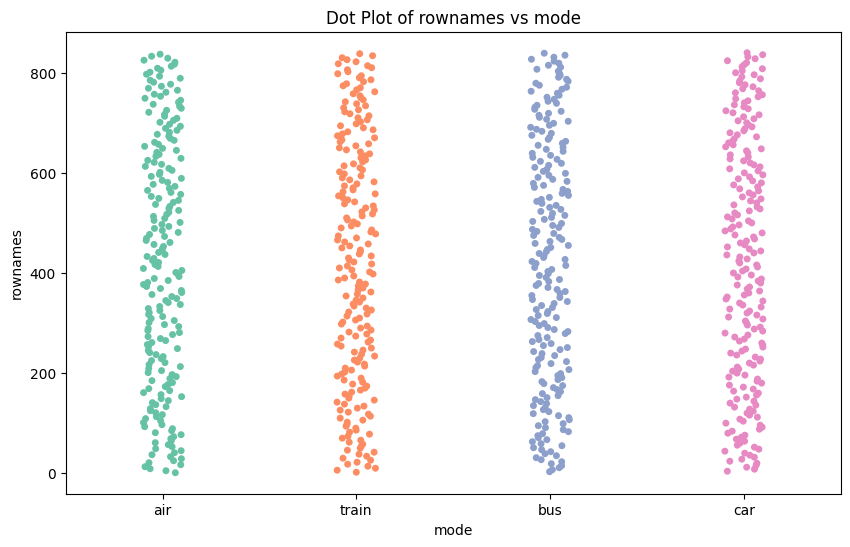

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


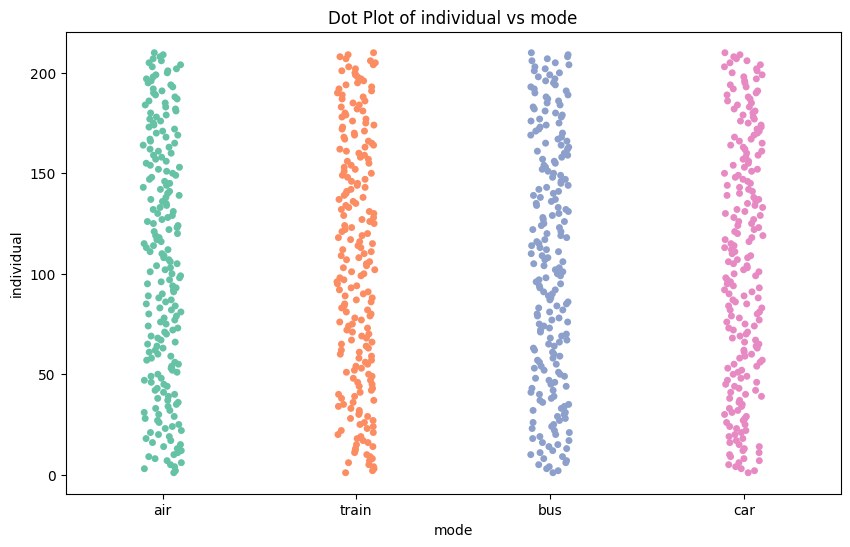

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


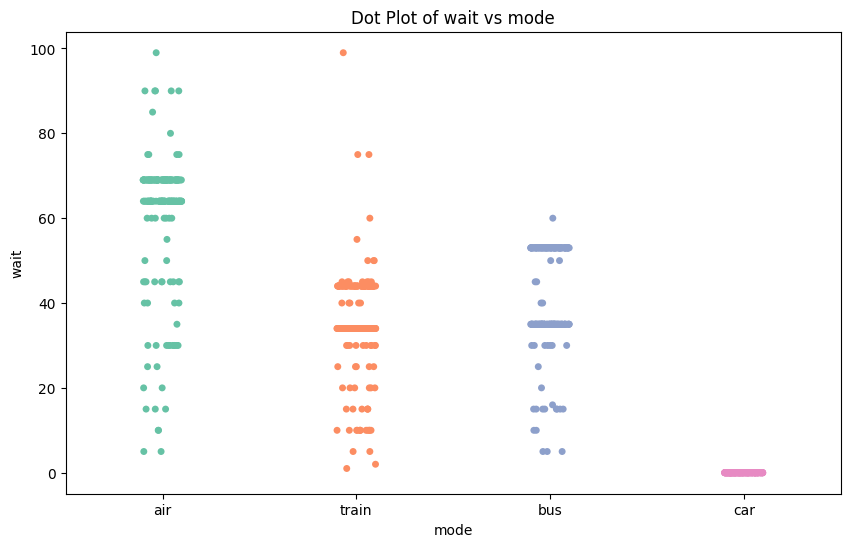

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


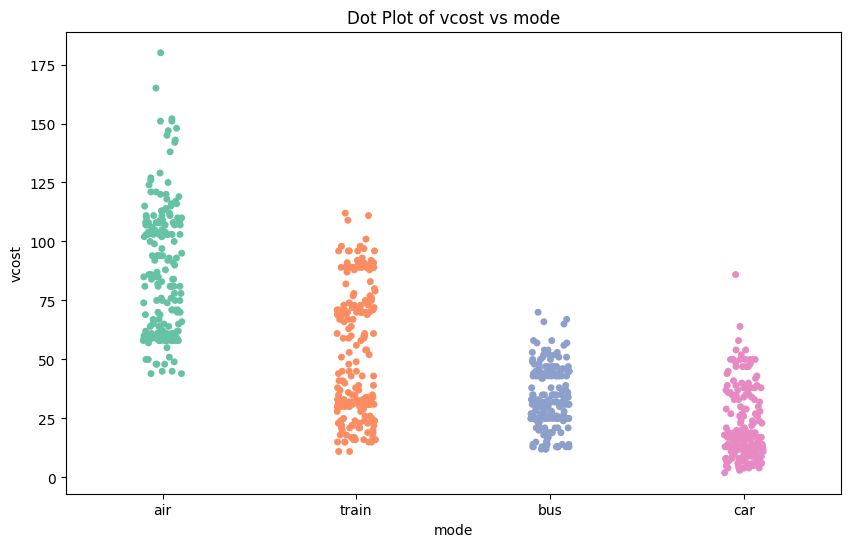

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


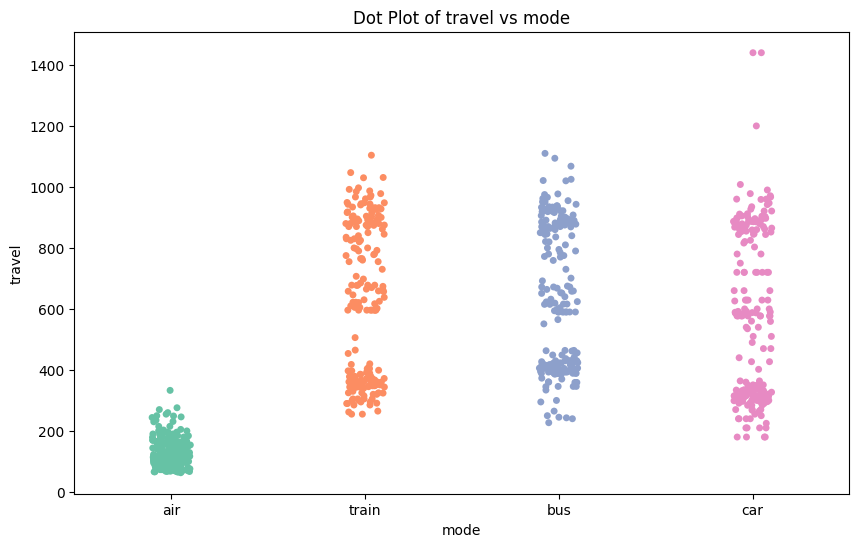

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


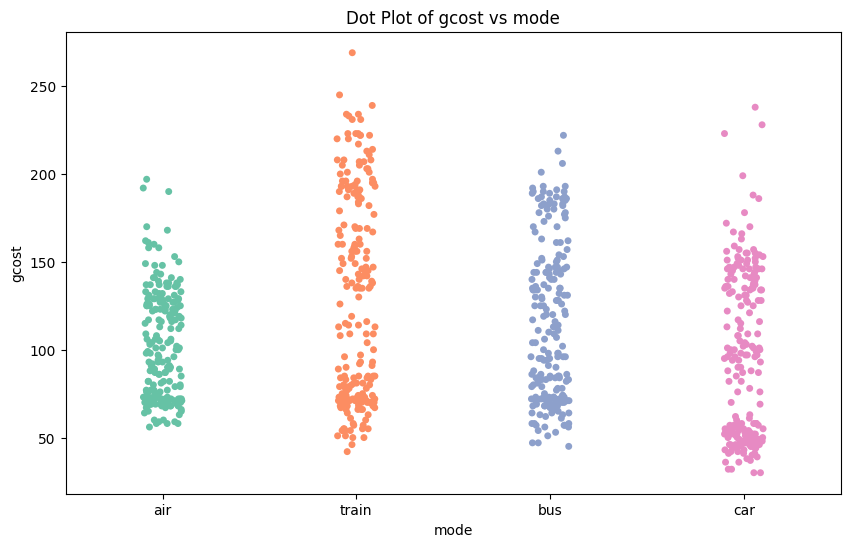

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


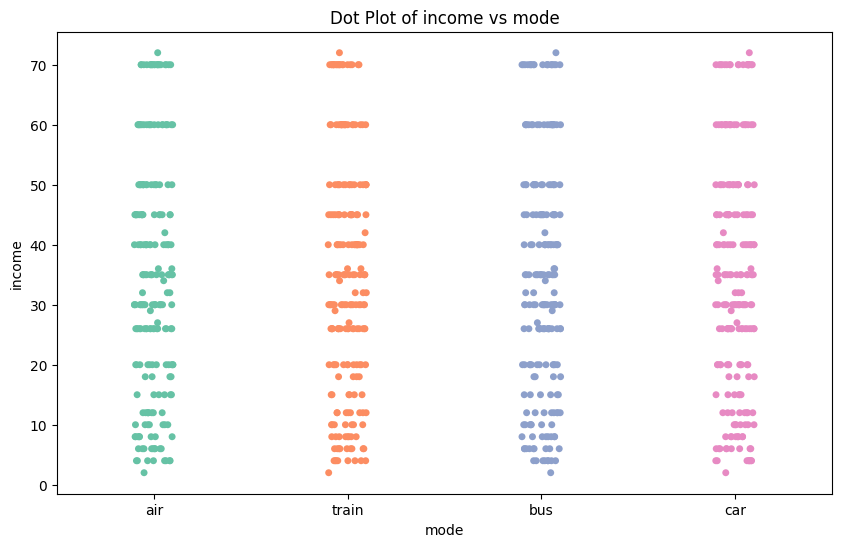

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


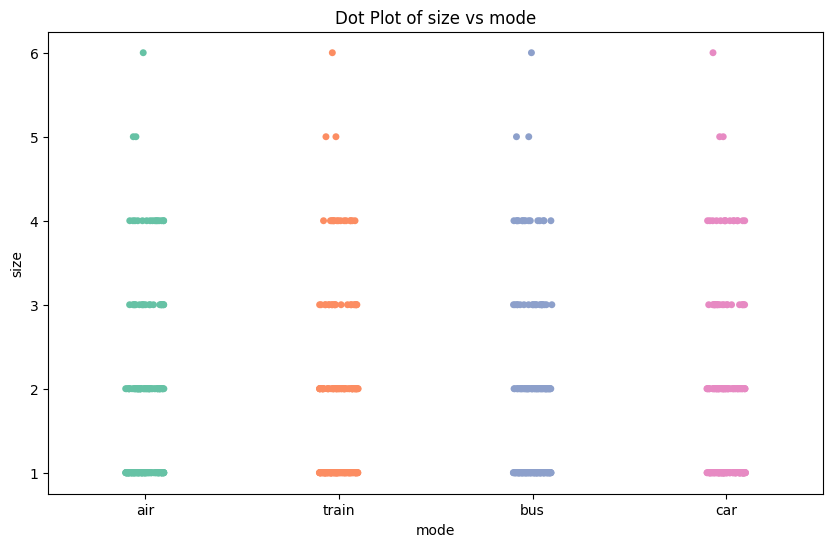

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


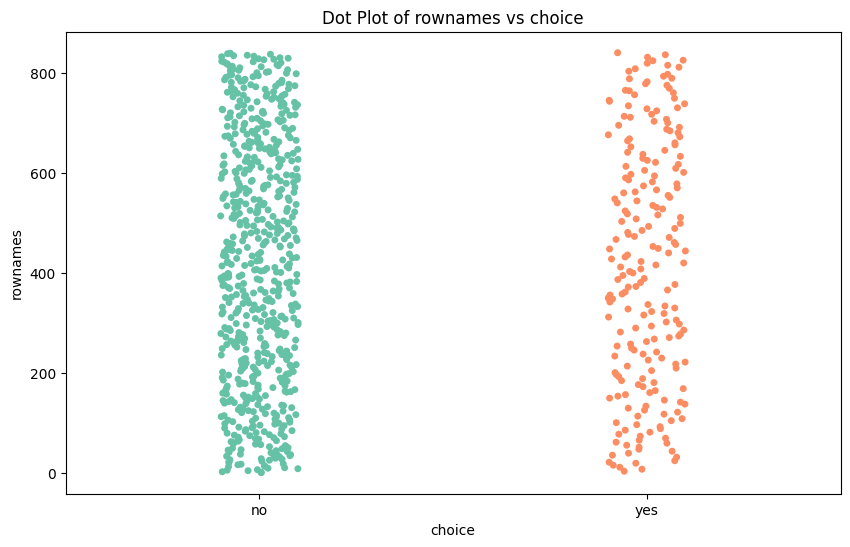

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


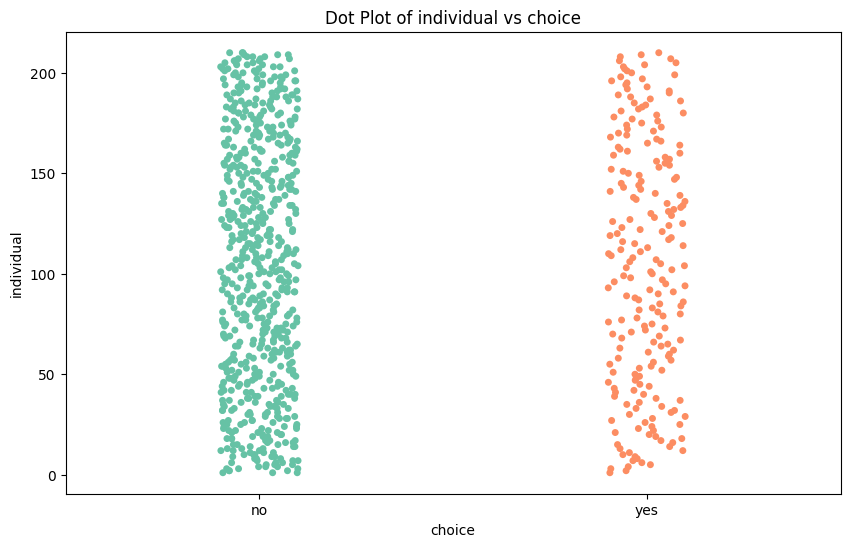

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


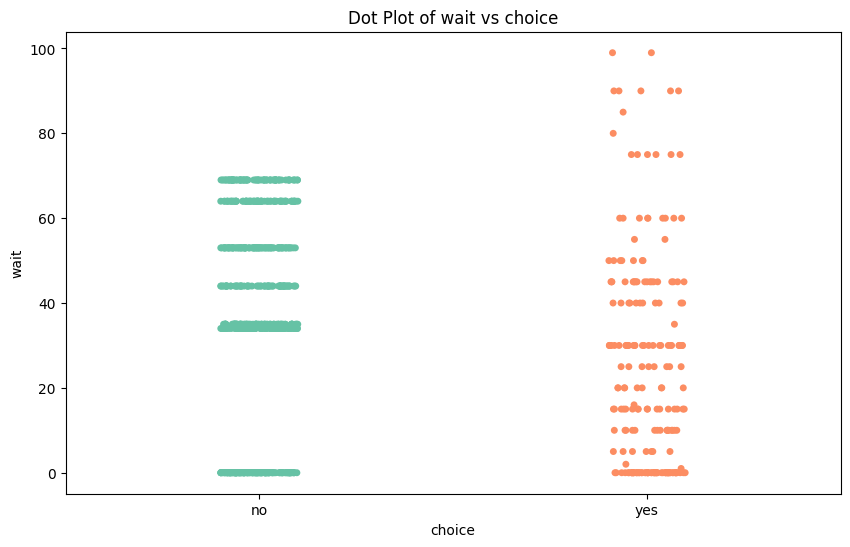

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


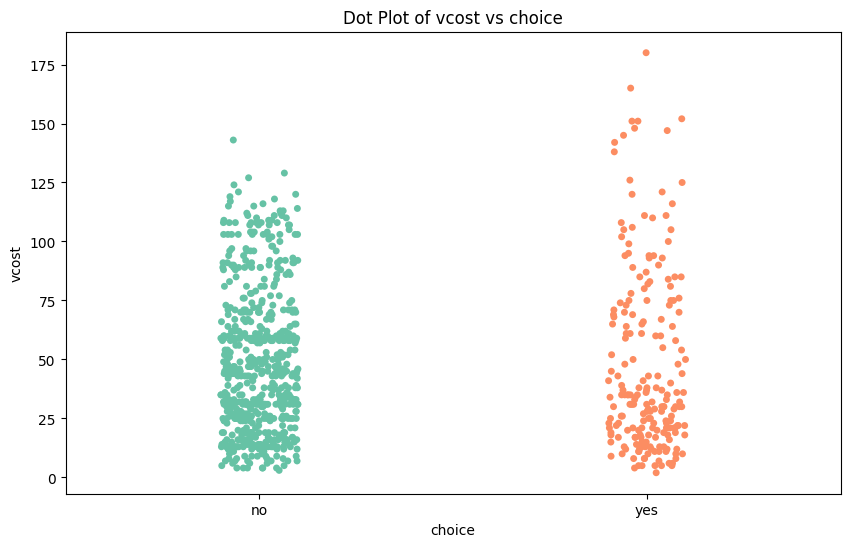

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


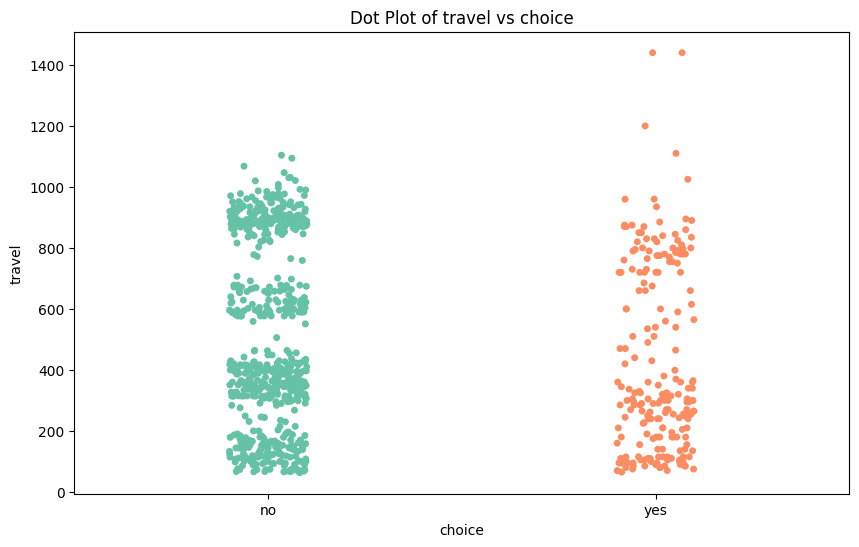

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


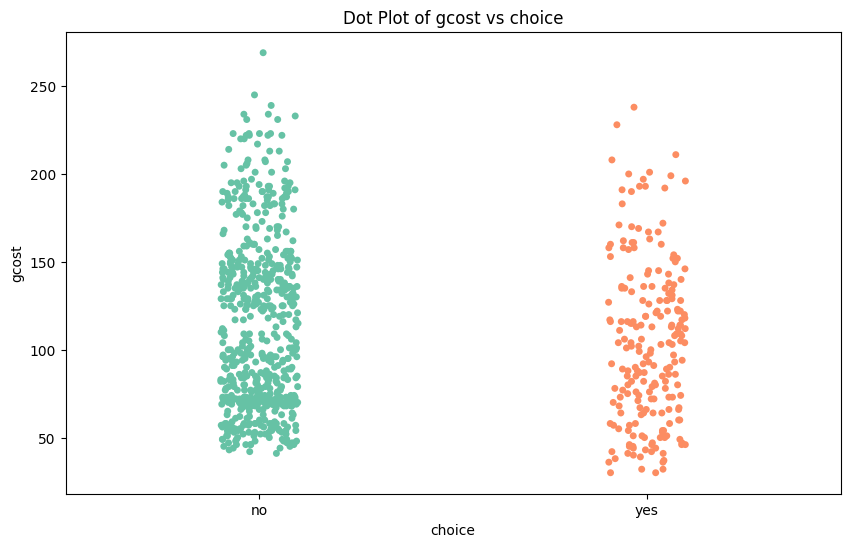

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


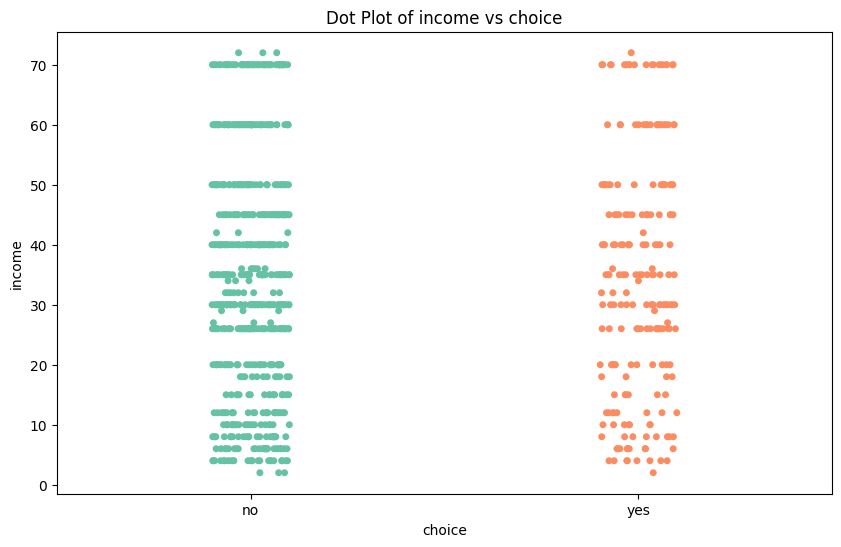

<ipython-input-47-f4d4ba59fb00>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')


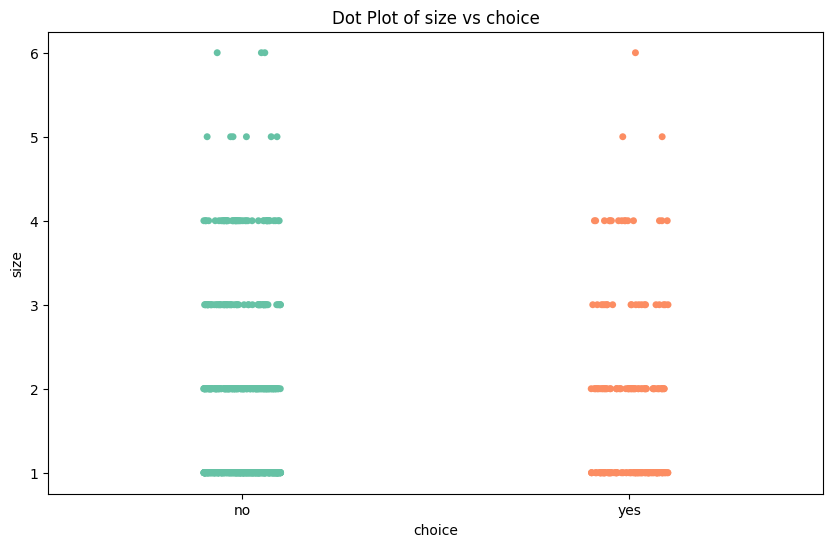

In [47]:
# Dot plot for categorical vs numerical variables
for col in categorical_columns.columns:
    for num_col in numerical_columns.columns:
        plt.figure(figsize=(10, 6))
        sns.stripplot(x=df_no_duplicates[col], y=df_no_duplicates[num_col], jitter=True, palette='Set2')
        plt.title(f'Dot Plot of {num_col} vs {col}')
        plt.show()



PCA for Multivariate Analysis:


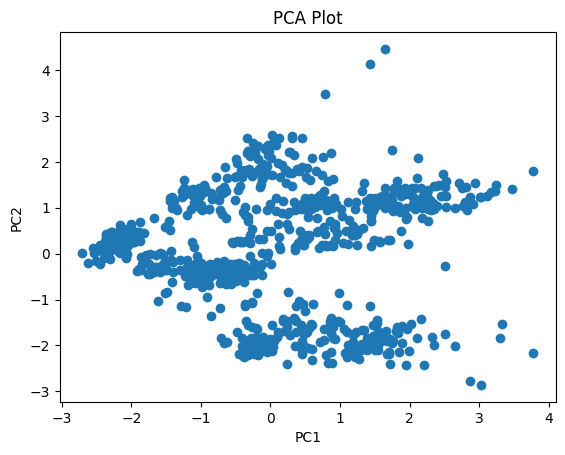

In [69]:
# Multivariate Analysis
# PCA for dimensionality reduction
print("PCA for Multivariate Analysis:")
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_no_duplicates[['wait', 'vcost', 'travel', 'gcost', 'income', 'size']])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# PCA Plot
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')
plt.show()

In [70]:
# Contingency Table
print("Contingency Table between 'mode' and 'choice':")
contingency_table = pd.crosstab(df_no_duplicates['mode'], df_no_duplicates['choice'])
print(contingency_table)


Contingency Table between 'mode' and 'choice':
choice   no  yes
mode            
air     152   58
bus     180   30
car     151   59
train   147   63



Multidimensional Scaling (MDS):


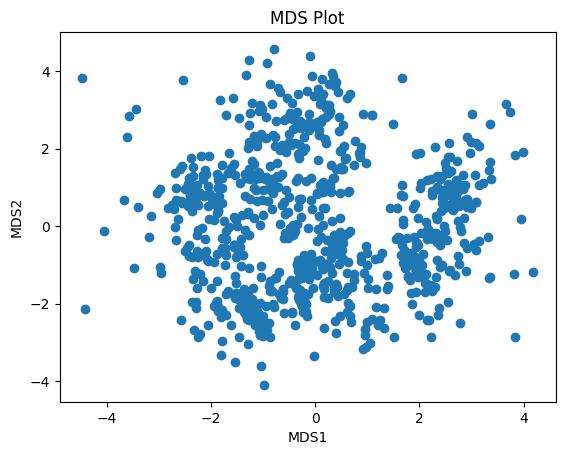

In [71]:
# Non-Linear Methods: Multidimensional Scaling (MDS)
print("Multidimensional Scaling (MDS):")
mds = MDS(n_components=2, random_state=42)
mds_result = mds.fit_transform(scaled_data)

# MDS Plot
plt.scatter(mds_result[:, 0], mds_result[:, 1])
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.title('MDS Plot')
plt.show()

In [72]:
# Linear Methods: Singular Value Decomposition (SVD)
print("Singular Value Decomposition (SVD):")
U, s, Vt = np.linalg.svd(scaled_data, full_matrices=False)
print("U Matrix:")
print(U)
print("Singular Values:")
print(s)
print("Vt Matrix:")
print(Vt)


Singular Value Decomposition (SVD):
U Matrix:
[[ 0.00443675  0.05504298  0.00948353  0.01206067 -0.03648253 -0.01288217]
 [ 0.02478092  0.01080223  0.0109423   0.01758464 -0.02308103  0.00729077]
 [ 0.02643369  0.00712381  0.01034326  0.0161004  -0.03366744  0.0114517 ]
 ...
 [-0.036119   -0.01868892 -0.08452467 -0.00580769  0.00284048  0.01528104]
 [-0.02282058 -0.01503286 -0.08981498 -0.01089981 -0.03471968  0.01821888]
 [ 0.02383442 -0.0355344  -0.09218158  0.006112    0.03700624  0.01467204]]
Singular Values:
[39.99819968 37.7568354  31.45667184 26.76922349 17.13383106  3.85794079]
Vt Matrix:
[[-0.39889708 -0.58185535 -0.26191836 -0.63858226 -0.14385837 -0.07239966]
 [ 0.5276542   0.34615127 -0.68992517 -0.3455272  -0.03788278 -0.07028117]
 [-0.06491257  0.16403528  0.10541365  0.07499238 -0.63573038 -0.74026332]
 [-0.22070227  0.13108905 -0.05231108 -0.05972305  0.74771472 -0.60722778]
 [-0.7134828   0.53978927 -0.33964488  0.09239538 -0.12097379  0.247062  ]
 [ 0.02193906  0.454


Factor Analysis:


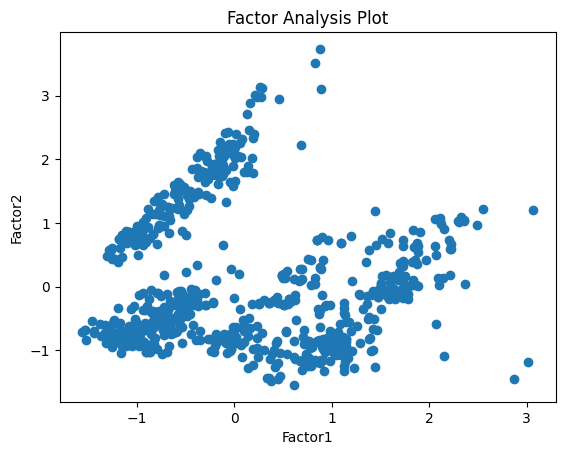

In [73]:
# Factor Analysis
from sklearn.decomposition import FactorAnalysis
print("Factor Analysis:")
fa = FactorAnalysis(n_components=2)
fa_result = fa.fit_transform(scaled_data)

# Factor Analysis Plot
plt.scatter(fa_result[:, 0], fa_result[:, 1])
plt.xlabel('Factor1')
plt.ylabel('Factor2')
plt.title('Factor Analysis Plot')
plt.show()
